<h1 style="background-color:#FF45D7; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Metadata
</h1>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Customer Data Base
</h2>

- *carID* - An attribute that contains an identifier for each car;
- *Brand* -  The car’s main brand (e.g. Ford, Toyota);
- *model* -  The car model;
- *year* -  The year of Registration of the Car;
- *mileage* - The total reported distance travelled by the car (inmiles);
- *tax* - The amount of road tax (in £) that, in 2020, wasapplicable to the car in question;
- *fuelType* - Type of Fuel used by the car (Diesel, Petrol, Hybrid,Electric);
- *mpg* - Average Miles per Gallon;
- *engineSize* - Size of Engine in liters (Cubic Decimeters);
- *paintQuality%* - The mechanic’s assessment of the cars’ overall paintquality and hull integrity (filled by the mechanicduring evaluation);
- *previousOwners* - Number of previous registered owners of the vehicle.
- *hasDamage* - Boolean marker filled by the seller at the time ofregistration stating whether the car is damaged or not;
- *price* The car’s price when purchased by Cars 4 You (in £);




In [1]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import lasso_path, SGDRegressor


# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import TargetEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import ElasticNet
from sklearn.compose import TransformedTargetRegressor


#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)


In [2]:
# path to folder
df_train = pd.read_csv("project_data/train.csv", delimiter=',', header=0, decimal='.', quotechar='"')

In [3]:
#divinding into X and y, as well as validation set and training set
X_test = pd.read_csv("project_data/test.csv", delimiter=',', header=0, decimal='.', quotechar='"')
# setting 'carID' as index
df_train.set_index('carID', inplace = True)
X_test.set_index('carID', inplace = True)


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
1. Data Pre-processing and Cleaning
</h2>

<h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
.shape, .head() and .tail() visualizations
</h3>

In [4]:
df_train.shape, X_test.shape

((75973, 13), (32567, 12))

In [5]:
df_train.head() #Checking the first rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [6]:
X_test.head() #Checking the first rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [7]:
df_train.tail() #Checking the last rows of the dataset df_train

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [8]:
X_test.tail() #Checking the last rows of the dataset X_test

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
105775,VW,Tiguan,2017.0,Manual,27575.00000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
81363,BMW,X2,2020.0,Automatic,1980.00000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
76833,Audi,Q5,2019.0,Semi-Auto,8297.00000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
91768,Mercedes,A Class,2019.0,Manual,-50755.21023,Petrol,145.0,28.5,1.3,81.0,1.0,0.0
99627,Toyota,Yaris,2017.0,Automatic,11071.00000,Petrol,30.0,58.0,1.3,98.0,4.0,0.0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Data types, duplicate/missing/unique values, typecasting, feature stats
</h3>

### **Data Types and Typecasting**

In [10]:
df_train.dtypes #Checking the datatypes of each feature in the dataset df_train

Brand              object
model              object
year              float64
price               int64
transmission       object
mileage           float64
fuelType           object
tax               float64
mpg               float64
engineSize        float64
paintQuality%     float64
previousOwners    float64
hasDamage         float64
dtype: object

'year' should be a datetime object. 'previousOwnwers' is also portrayed on the wrong data type, as it should be an Integer. The remainder seem to be correctly assigned

In [11]:
(df_train['hasDamage']).isna().sum()

1548

In [12]:
#correcting the data types
df_train['year']=pd.to_datetime(df_train['year'], format='%Y')
df_train["year"] = df_train["year"].dt.year
X_test['year']=pd.to_datetime(X_test['year'], format='%Y')
X_test["year"] = X_test["year"].dt.year

df_train['previousOwners'] = df_train['previousOwners'].apply(lambda x: int(x) if pd.notna(x) else x)
X_test['previousOwners'] = X_test['previousOwners'].apply(lambda x: int(x) if pd.notna(x) else x)

df_train['hasDamage'] = df_train['hasDamage'].apply(lambda x: False if pd.isna(x) else True)
X_test['hasDamage'] = X_test['hasDamage'].apply(lambda x: False if pd.isna(x) else True)



### **Missing Values**

In [13]:
df_train.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
df_train.isna().sum() #Checking the number of missing values in each feature of the dataset X

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage            0
dtype: int64

In [14]:
X_test.replace("", np.nan, inplace=True) #Replacing empty strings with NaN values
X_test.isna().sum() #Checking the number of missing values in each feature of the

Brand              649
model              650
year               653
transmission       623
mileage            689
fuelType           656
tax               3308
mpg               3288
engineSize         628
paintQuality%      625
previousOwners     597
hasDamage            0
dtype: int64

<span style="color:red">The missing values on all features have to be handled!</span>


### **Duplicated Values**

In [15]:

print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 4


The training set has 11 duplicated lines. Its' presence is insignificant, therefore we can drop them.

In [16]:
df_train = df_train.drop_duplicates()
print("\nDuplicated values:", df_train.duplicated().sum())


Duplicated values: 0


In [17]:
print("\nDuplicated values:", X_test.duplicated().sum())



Duplicated values: 0


### **Numerical Variables Statistics**

In [18]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74478.0,2017.091785,2.211158,1970.000000,2016.0,2017.0,2019.0,2024.000000
price,75969.0,16882.001922,9737.075658,450.000000,10200.0,14699.0,20950.0,159999.000000
mileage,74507.0,23004.761128,22130.041696,-58540.574478,7423.5,17301.0,32428.0,323000.000000
tax,68067.0,120.328500,65.522046,-91.121630,125.0,145.0,145.0,580.000000
mpg,68045.0,55.152286,16.497834,-43.421768,46.3,54.3,62.8,470.800000
engineSize,74453.0,1.660161,0.573464,-0.103493,1.2,1.6,2.0,6.600000
paintQuality%,74445.0,64.591773,21.020975,1.638913,47.0,65.0,82.0,125.594308
previousOwners,74419.0,1.994948,1.464919,-2.000000,1.0,2.0,3.0,6.000000


### **Categorical Features Unique Values**

Checking if all the unique values of the categorical features are appropriate.

In [19]:
for var in df_train.columns:
    if df_train[var].dtype == 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

Brand unique values: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot'] 

model unique values: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 '

We observe that there are typos present on all categorical variables. We have to get them fixed in order to understand the data better and clear out inconsistencies.


In [20]:
for var in X_test.columns:
    if X_test[var].dtype == 'object':
        print(f"{var} unique values: {X_test[var].unique()} \n")

Brand unique values: ['Hyundai' 'VW' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyot' 'Toyota'
 'Audi' nan 'For' 'Ope' 'toyota' 'vw' 'hyundai' 'MW' 'SKODA' 'ord' 'udi'
 'bmw' 'V' 'BM' 'HYUNDAI' 'OPEL' 'mercedes' 'audi' 'Mercede' 'pel' 'opel'
 'FORD' 'yundai' 'ford' 'Aud' 'oyota' 'MERCEDES' 'ercedes' 'AUDI' 'koda'
 'Hyunda' 'W' 'skoda' 'Skod' 'ercede' 'TOYOTA' 'ERCEDES' 'kod' 'ORD' 'v'
 'ud' 'M' 'FOR' 'for' 'MERCEDE' 'YUNDAI' 'PEL' 'ope' 'or' 'TOYOT' 'hyunda'
 'oyot' 'UDI' 'mw' 'pe' 'bm'] 

model unique values: [' I30' ' Tiguan' ' 2 Series' ' Grandland X' '1 Series' ' Fiesta' ' X1'
 ' B Class' ' Focus' ' Superb' ' 5 Series' ' C Class' ' Up' ' Aygo' 'Golf'
 ' M CLAS' ' Land Cruiser' ' TT' ' Adam' ' Zafira' ' E Class' ' Golf'
 ' 3 Series' ' IX20' ' A4' ' Yaris' ' Passat' ' I10' ' Mokka X'
 ' EcoSport' ' 1 Series' ' 4 Series' ' A7' ' Corsa' ' Kuga' ' Grand C-MAX'
 ' Q2' ' M4' ' A Class' ' RAV4' ' Fabia' ' Insignia' ' A1' ' X6' ' Meriva'
 ' Caravelle' ' Octavia' ' Auris' ' X-CLASS' ' FOCUS' '

We designed a function to automatically correct the typos found in the training and test data set:

In [21]:
def normalize_data(x):
    x = str(x)
    x = x.lower()
    x = x.replace("_", "")
    x = x.replace("-", "")
    x = x.replace(" ", "")
    if x == "nan":
        return np.nan
    return x


def correct_missing_letters(value, valid_list, max_missing=2):
    """
    corrects values with missing letters based on valid_list
    """
    best_match = value
    smallest_diff = 999
    if pd.isna(value):  # <- ignores NaN
        return np.nan
    for ref in valid_list:
        # absolute length difference
        len_diff = abs(len(ref) - len(value))
        if len_diff == 0 or len_diff > max_missing:
            continue  # ignora se igual ou diferença > limite

        # verificar se o valor é subsequência do nome correto (mantendo ordem)
        it = iter(ref)
        is_subseq = all(ch in it for ch in value)

        if is_subseq and len_diff < smallest_diff:
            smallest_diff = len_diff
            best_match = ref

    return best_match

valid_list = []


In [22]:
#correcting 'Brand' feature
valid_list = ["bmw", "mercedes", "ford", "hyundai", "audi", "toyota", "opel", "skoda", "vw"]
df_train["Brand"] = df_train["Brand"].apply(normalize_data)
df_train["Brand"] = df_train["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))


X_test["Brand"] = X_test["Brand"].apply(normalize_data)
X_test["Brand"] = X_test["Brand"].apply(lambda x: correct_missing_letters(x, valid_list))

df_train[df_train["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["Brand"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other", " None"])] = np.nan

print(df_train["Brand"].unique())



['vw' 'toyota' 'audi' 'ford' 'bmw' 'skoda' 'opel' 'mercedes' 'hyundai' nan]


In [23]:
#correcting 'fuelType' feature
valid_list = ["diesel", "petrol", "hybrid", "electric","other"]
df_train["fuelType"] = df_train["fuelType"].apply(normalize_data)
df_train["fuelType"] = df_train["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))

X_test["fuelType"] = X_test["fuelType"].apply(normalize_data)
X_test["fuelType"] = X_test["fuelType"].apply(lambda x: correct_missing_letters(x, valid_list))
X_test["fuelType"].unique()

df_train[df_train["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["fuelType"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

print(df_train["fuelType"].unique())


['petrol' 'diesel' 'hybrid' nan 'other' 'electric']


In [24]:
#correcting 'model' feature
car_models = [
"GOLF", "POLO", "PASSAT", "TIGUAN", "TIGUANALLSPACE", "TOUAREG", "TROC", "TCROSS", "ARTEON",
"SHARAN", "JETTA", "CC", "CARAVELLE", "CALIFORNIA", "CADDY", "CADDYMAXI", "TOURAN", "GOLFSV",
"BEETLE", "SCIROCCO", "UP", "AMAROK", "EOS", "FOX", "FOCUS", "FIESTA", "MONDEO", "KUGA", "GALAXY",
"SMAX", "BMAX", "ECOSPORT", "PUMA", "TOURNEOCUSTOM", "TOURNEOCONNECT", "KA", "KAPLUS", "CMAX",
"GRANDCMAX", "EDGE", "MUSTANG", "GRANDTOURNEOCONNECT", "FUSION", "STREETKA", "RANGER", "ESCORT",
"CORSA", "ASTRA", "INSIGNIA", "MOKKA", "ZAFIRA", "VIVA", "MERIVA", "ADAM", "COMBOLIFE", "CROSSLANDX",
"GRANDLANDX", "GTC", "ANTARA", "VIVARO", "VECTRA", "AGILA", "TIGRA", "CASCADA", "AMPERA", "SERIES1",
"SERIES2", "SERIES3", "SERIES4", "SERIES5", "SERIES6", "SERIES7", "SERIES8", "X1", "X2", "X3", "X4",
"X5", "X6", "X7", "Z3", "Z4", "M2", "M3", "M4", "M5", "M6", "A1", "A2", "A3", "A4", "A5", "A6", "A7",
"A8", "Q2", "Q3", "Q5", "Q7", "Q8", "S3", "S4", "S5", "S8", "RS3", "RS4", "RS5", "RS6", "SQ5", "SQ7",
"TT", "R8", "ACLASS", "BCLASS", "CCLASS", "ECLASS", "SCLASS", "CLACLASS", "CLSCLASS", "GLACLASS",
"GLBCLASS", "GLCCLASS", "GLECLASS", "GLSCLASS", "GLCLASS", "GCLASS", "VCLASS", "XCLASS", "SLCLASS",
"SLKCLASS", "MCLASS", "CLK", "CLCLASS", "CLCCLASS", "MERCEDES200", "MERCEDES230", "MERCEDES220",
"YARIS", "AYGO", "COROLLA", "CHR", "AVENSIS", "PRIUS", "RAV4", "HILUX", "VERSO", "SUPRA",
"LANDCRUISER", "CAMRY", "PROACEVERSO", "URBANCRUISER", "AURIS", "GT86", "I10", "I20", "I30", "I40",
"I800", "IONIQ", "KONA", "TUCSON", "SANTAFE", "GETZ", "IX20", "IX35", "VELOSTER", "ACCENT",
"TERRACAN", "FABIA", "OCTAVIA", "SUPERB", "KAROQ", "KODIAQ", "KAMIQ", "YETI", "SCALA", "RAPID",
"CITIGO", "ROOMSTER", "LEON", "ATECA", "TOLEDO", "ARONA", "IBIZA", "ALHAMBRA", "SHUTTLE", "KADJAR", "IQ"
]

valid_list_models = [x.lower() for x in car_models]
df_train["model"] = df_train["model"].apply(normalize_data)
df_train["model"] = df_train["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
#df_train["models"].unique()
X_test["model"] = X_test["model"].apply(normalize_data)
X_test["model"] = X_test["model"].apply(lambda x: correct_missing_letters(x, valid_list_models))
X_test["model"].unique()

manual_corrections = {
    'ka+' : 'ka',
    'slk' : 'slkclass',
    '7series' : 'series7',
    '230' : 'mercedes230',
    'yetioutdoor' : 'yeti',
    'yetioutdoo' : 'yeti',
    'zafiratoure' : 'zafira',
    '220' : 'mercedes220',
    '6series' : 'series6',
    '4series' : 'series4',
    'zafiratourer' : 'zafira',
    '2series' : 'series2',
    '1serie' : 'series1',
    '1series' : 'series1',
    'rclass' : 'eclass',
    '7serie' : 'series7',
    '180' : 'mercedes200',
    'caddylife' : 'caddy',
    '5series' : 'series5',
    '5serie' : 'series5',
    '3series' : 'series3',
    '6serie' : 'series6',
    '3serie' : 'series3',
    '2serie' : 'series2',
    '4serie' : 'series4',
    '200' : 'mercedes200',
    'sl' : 'slclass',
    'transittourneo' : 'tourneoconnect',
    'amica' : 'agila',
    'mokkax' : 'mokka',
    'caddymaxilife' : 'caddymaxi',
    '8series' : 'series8',
    'versos' : 'verso',
    'caddymaxilif' : 'caddymaxi',
    '8serie' : 'series8',
    'rs7' : 'rs6',
    'slk': 'slc',
    'zafiratourer':'zafira'
}
df_train["model"] = df_train["model"].replace(manual_corrections)
X_test["model"] = X_test["model"].replace(manual_corrections)

df_train[df_train["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan
X_test[X_test["model"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"])] = np.nan

In [25]:
#correcting 'transmission' feature

valid_list = ["automatic", "manual", "semiauto", 'unknown']
df_train["transmission"] = df_train["transmission"].apply(normalize_data)
df_train["transmission"] = df_train["transmission"].apply(lambda x: correct_missing_letters(x, valid_list))
df_train["transmission"].unique()

df_train.loc[df_train["transmission"].isin(["nan", "none", "null", "unknown", "UNKNOWN", "nknown", "nknow", "Other"]), "transmission"] = np.nan
X_test.loc[X_test["transmission"].isin(["nan", "none", "null", "unknown", "UNKNOWN", "nknown", "nknow", "Other"]), "transmission"] = np.nan



### **Numerical Features Unique Values**

Checking if all the unique values of the Numerical features are appropriate.

In [26]:
for var in df_train.columns:
    if df_train[var].dtype != 'object':
        print(f"{var} unique values: {df_train[var].unique()} \n")

year unique values: [2016. 2019. 2018. 2014. 2017. 2020. 2013.   nan 2015. 2023. 2011. 2012.
 2003. 2009. 2007. 2005. 2004. 2010. 2008. 2024. 2006. 2001. 2000. 2002.
 2022. 1996. 1998. 1970. 1999. 1997.] 

price unique values: [22290 13790 24990 ... 33606 16809 25785] 

mileage unique values: [28421.  4589.  3624. ... 13613. 52134. 69072.] 

tax unique values: [         nan 145.          30.          20.         150.
 160.         -56.19320154   0.         125.         200.
 250.         135.         300.         205.         260.
 326.02823317 325.         -45.78061049 265.         305.
 303.14889146 235.         299.47350391 240.         165.
 140.         540.         155.         220.         120.
 330.         290.48678508 -20.24107949 -18.33074314 327.91577835
 270.         115.         185.         316.48718937 570.
 -49.15354066 316.29630636 -60.6840948  555.         277.38425448
 -91.12163048  10.         315.         190.         -31.91494466
 230.         -43.24208237 294.84

Some features have negative values where it does not make sense to exist. 

For 'previousOwners' we will substitute the negatives for 0, as it is the most likely value to be set.

In [27]:
#correcting negative previousOwners values
df_train["previousOwners"] = df_train["previousOwners"].clip(lower=0)
X_test["previousOwners"] = X_test["previousOwners"].clip(lower=0)

df_train["previousOwners"].unique()


array([ 4.,  1.,  0.,  3.,  2., nan,  6.])

For 'tax', 'mileage', 'mpg' and 'engineSize' the incorrect values are nearly insignificant, consequently they are removable. We proceeded with caution because by keeping all values above zero, NaNs were discarded...

In [28]:

df_train.loc[df_train["tax"] < 0, "tax"] = np.nan
df_train.loc[df_train["engineSize"] <= 0, "engineSize"] = np.nan
df_train.loc[df_train["mileage"] < 0, "mileage"] = np.nan
df_train.loc[df_train["mpg"] <= 0, "mpg"] = np.nan

# Apply the same logic to the test set
X_test.loc[X_test["tax"] < 0, "tax"] = np.nan
X_test.loc[X_test["engineSize"] <= 0, "engineSize"] = np.nan
X_test.loc[X_test["mileage"] < 0, "mileage"] = np.nan
X_test.loc[X_test["mpg"] <= 0, "mpg"] = np.nan





'hasDamage' is a dummy variable. For this reason, we will consider that the people who filled the spot on its' column are the ones with damage and the rest (Nan values) are cars not damaged.

In [29]:
df_train["has_reportedDamage"]=df_train["hasDamage"].map(lambda x: 1 if x==True else 0)
X_test["has_reportedDamage"]=X_test["hasDamage"].map(lambda x: 1 if x==True else 0)


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75969 entries, 69512 to 15795
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               74448 non-null  object 
 1   model               74452 non-null  object 
 2   year                74478 non-null  float64
 3   price               75969 non-null  int64  
 4   transmission        73711 non-null  object 
 5   mileage             74138 non-null  float64
 6   fuelType            74458 non-null  object 
 7   tax                 67689 non-null  float64
 8   mpg                 68009 non-null  float64
 9   engineSize          74189 non-null  float64
 10  paintQuality%       74445 non-null  float64
 11  previousOwners      74419 non-null  float64
 12  hasDamage           75969 non-null  bool   
 13  has_reportedDamage  75969 non-null  int64  
dtypes: bool(1), float64(7), int64(2), object(4)
memory usage: 8.2+ MB


### **Metric/Non-Metric Features**

Lets divide our features in numeric and non-numeric to treat them accordingly

In [31]:
cat_features=["Brand", "model", "fuelType", "transmission", "hasDamage"]
metric_features=df_train.columns.drop(cat_features).tolist()

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75969 entries, 69512 to 15795
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               74448 non-null  object 
 1   model               74452 non-null  object 
 2   year                74478 non-null  float64
 3   price               75969 non-null  int64  
 4   transmission        73711 non-null  object 
 5   mileage             74138 non-null  float64
 6   fuelType            74458 non-null  object 
 7   tax                 67689 non-null  float64
 8   mpg                 68009 non-null  float64
 9   engineSize          74189 non-null  float64
 10  paintQuality%       74445 non-null  float64
 11  previousOwners      74419 non-null  float64
 12  hasDamage           75969 non-null  bool   
 13  has_reportedDamage  75969 non-null  int64  
dtypes: bool(1), float64(7), int64(2), object(4)
memory usage: 8.2+ MB


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
2. Data Understanding
</h2>

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
 Individual Variable Analysis
 <h3>

### **Histograms**

We start plotting histograms of all the numerical features.

Text(0.5, 0.98, "Numeric Variables' Histograms")

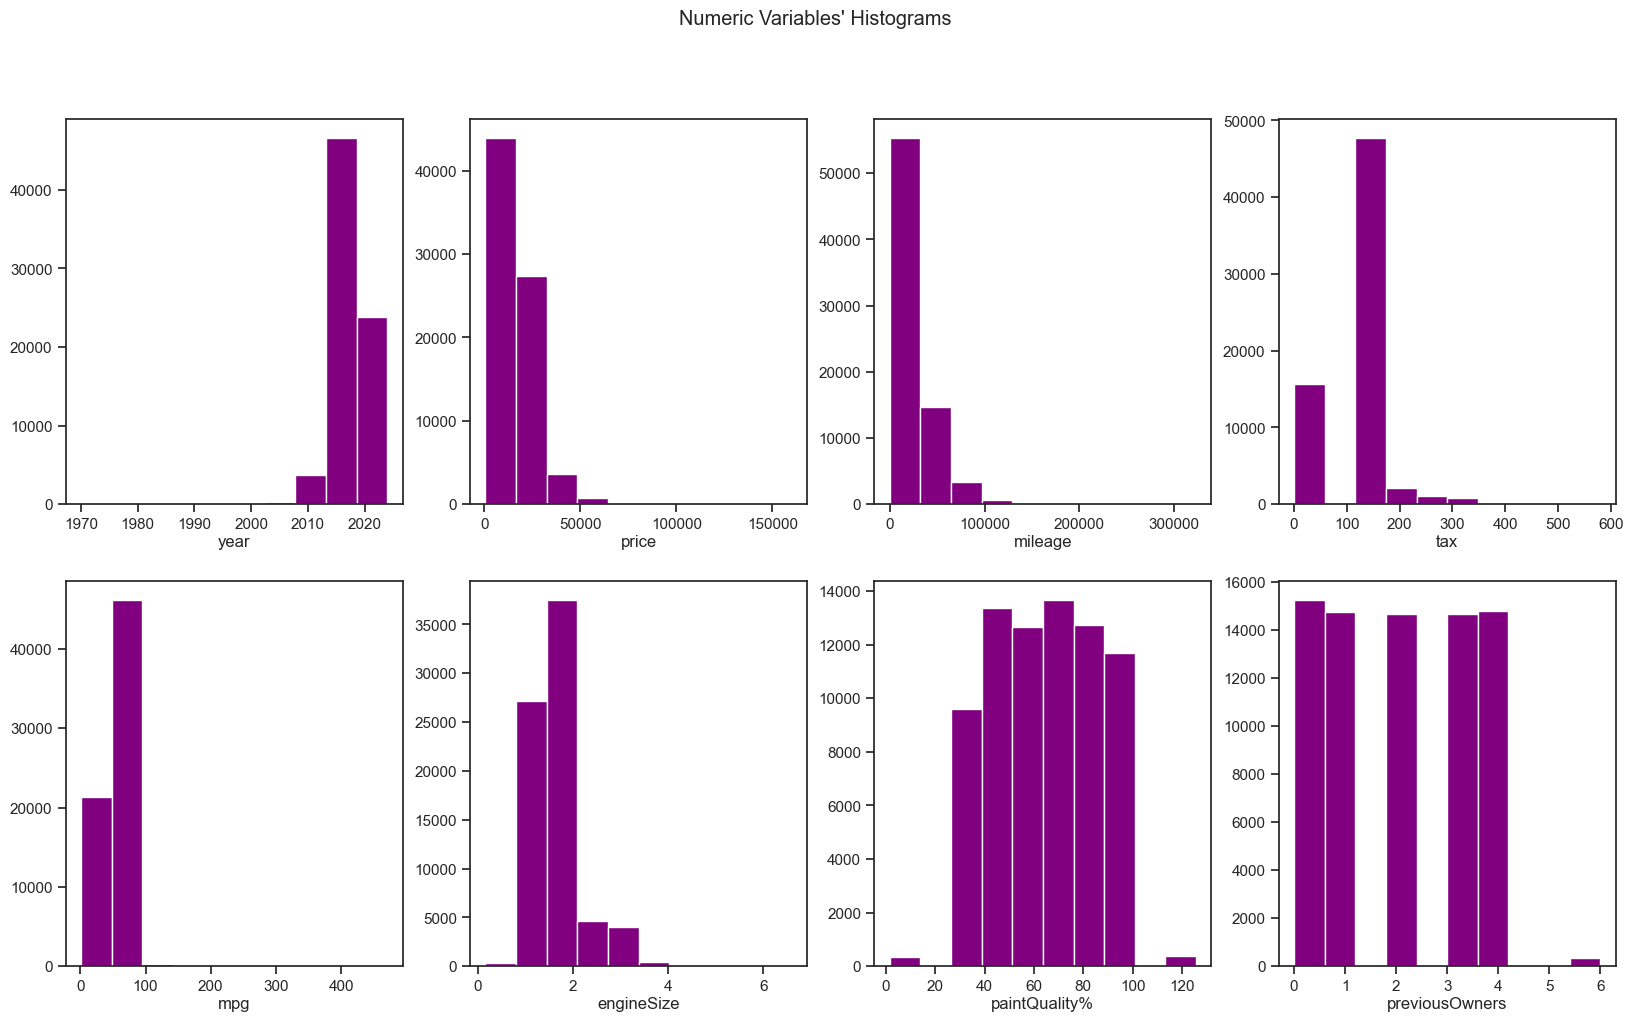

In [32]:
sp_rows = 2
sp_cols = 4


#Histograms
sns.set_style("ticks")
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_train[feat], color=("purple"))
    ax.set_title(feat, y=-0.13)  
# Layout
plt.suptitle("Numeric Variables' Histograms")

### **Boxplot**

We can also plot the boxplot of all the numerical features.

Text(0.5, 0.98, 'BoxPlots')

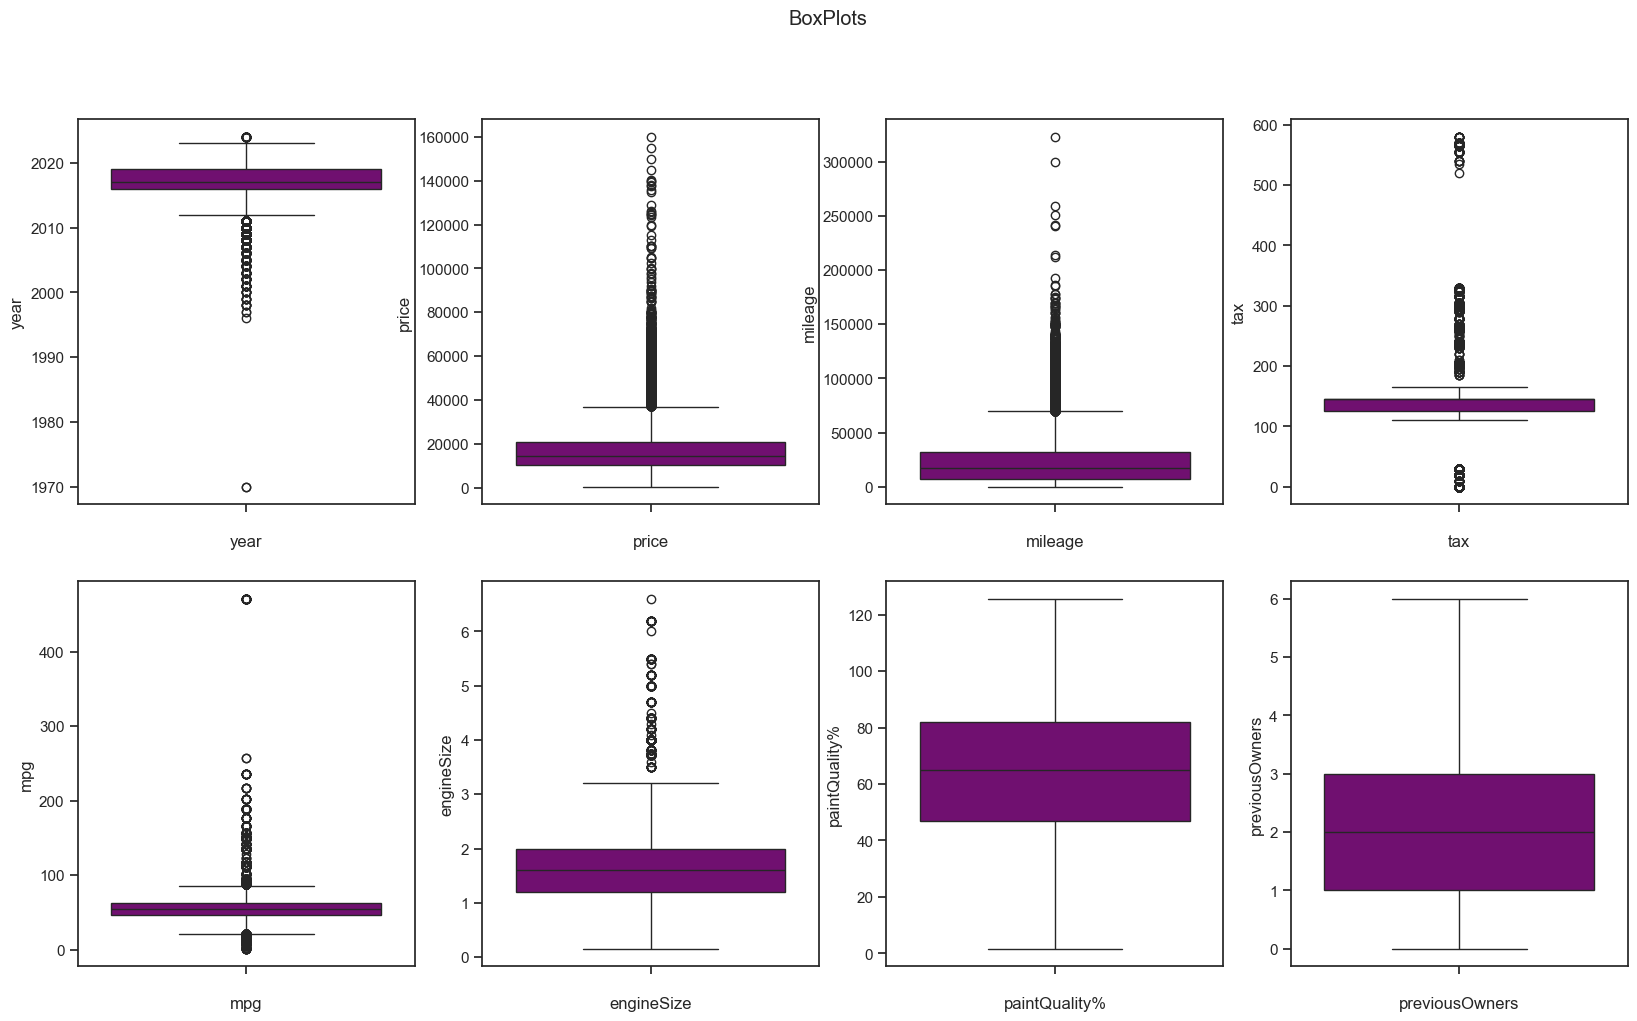

In [33]:
#boxplot
# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(y=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13) 

plt.suptitle("BoxPlots")



### **BarPlot**

For categorical features we will observe them via a Bar Plot.

Text(0.5, 0.98, "Categorical Variables' Histplot")

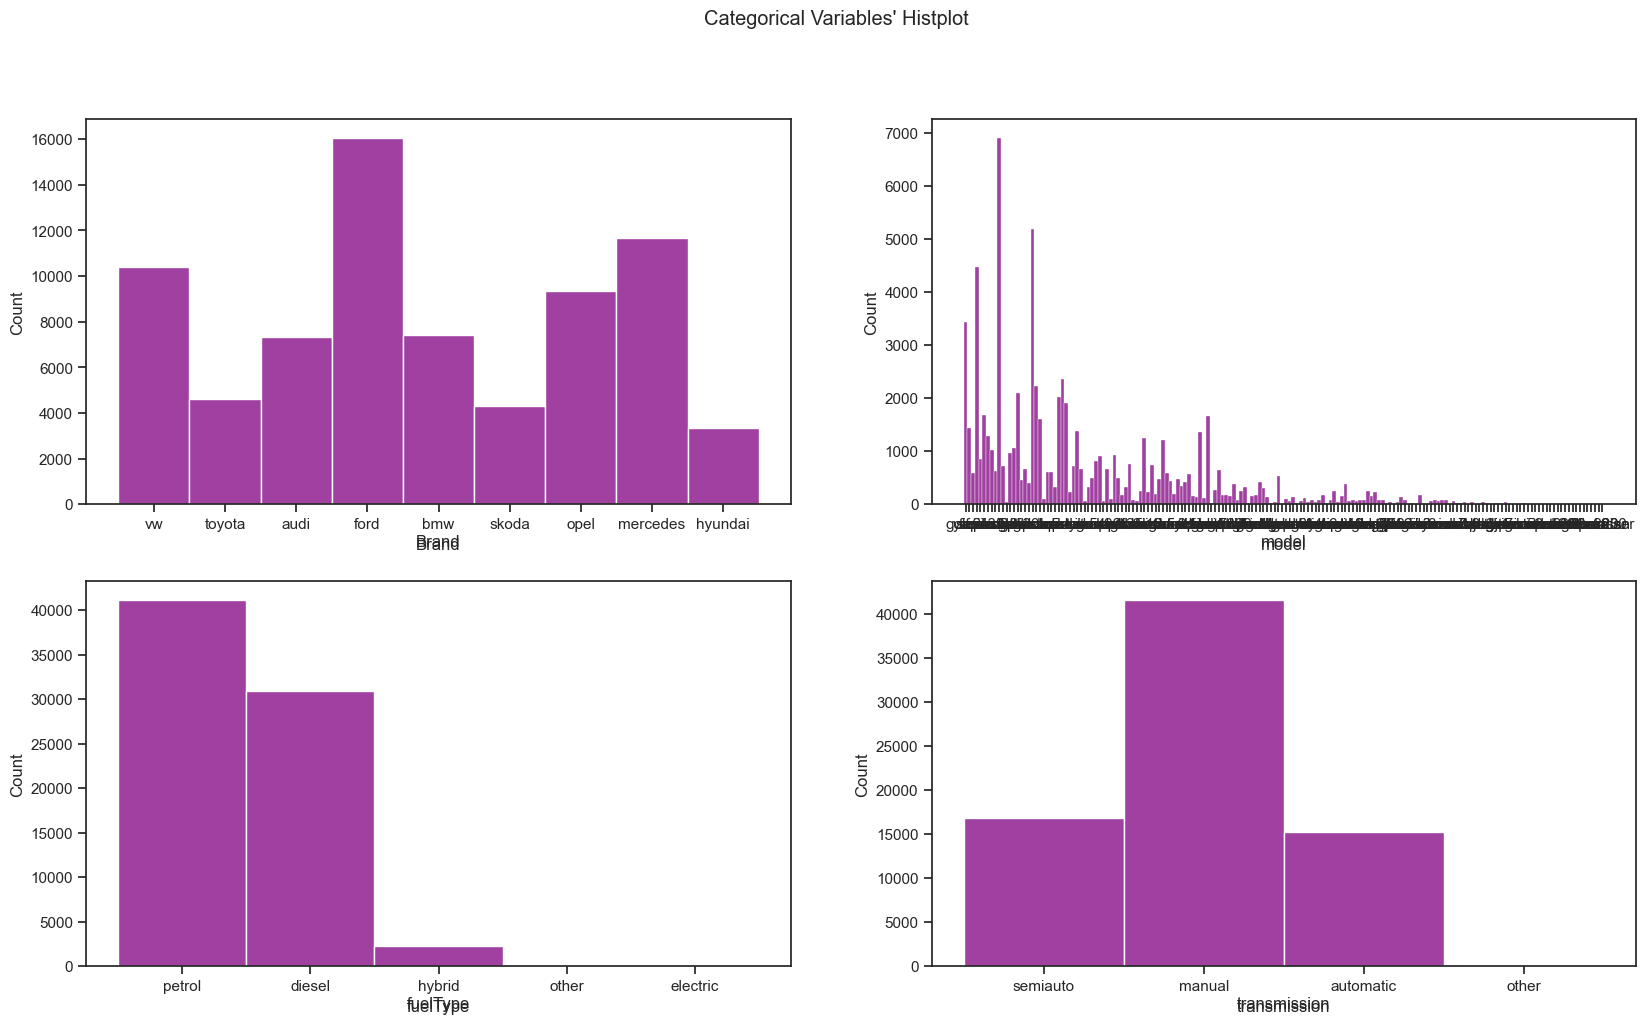

In [34]:
fig, axes = plt.subplots(2, 
                         2, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), cat_features): 
    sns.histplot(x=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13)



plt.suptitle("Categorical Variables' Histplot")

For better visualization plots we targetted important intervals.

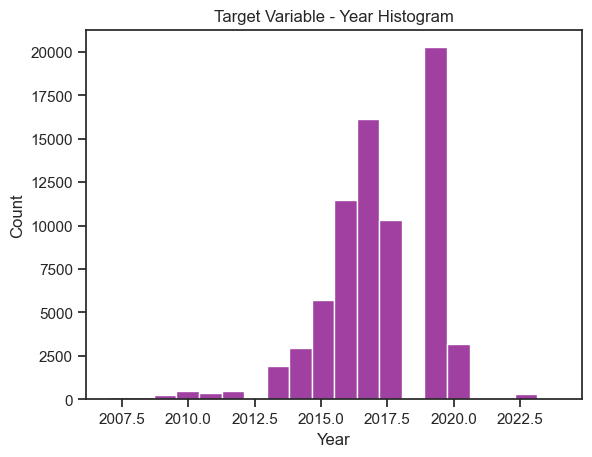

In [35]:
# Histogram of variable 'year' after 2007
sns.histplot(df_train[df_train["year"] >= 2007]["year"].astype(int), bins=20, color=("purple"))
plt.title("Target Variable - Year Histogram")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show() 

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Multivariate Analysis
<h3>

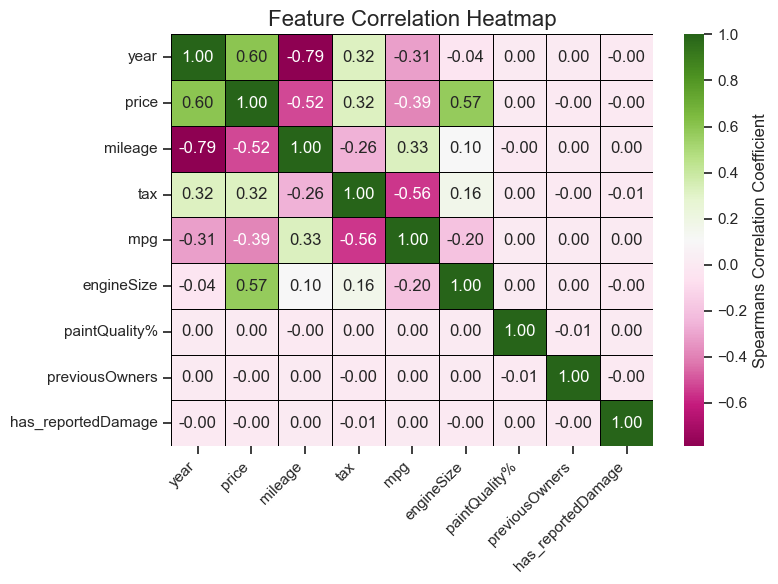

In [36]:
correlation_matrix_spearman = df_train[metric_features].corr(method='spearman')

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix_spearman,
    annot=True,     
    fmt=".2f",      
    cmap='PiYG',
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Spearmans Correlation Coefficient'}
)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Relationship with `price`
- **`year` ↗ `price` (ρ = 0.60)** → Newer cars tend to be more expensive.  
- **`mileage` ↘ `price` (ρ = -0.52)** → Cars with higher mileage usually have lower prices.  
- **`engineSize` ↗ `price` (ρ = 0.57)** → Larger engines are associated with higher prices.  
- **`mpg` ↘ `price` (ρ = -0.39)** → Cars with higher fuel efficiency are typically cheaper, possibly due to smaller engines or economy-focused models.  
- **`tax` ↗ `price` (ρ = 0.32)** → Higher tax values tend to correspond to higher-priced cars, likely reflecting larger or more powerful vehicles.

#### Relationships between predictors
- **`year` ↘ `mileage` (ρ = -0.79)** → Newer cars have lower mileage, a strong and expected inverse relationship.  
- **`tax` ↘ `mpg` (ρ = -0.56)** → Cars that consume less fuel (higher mpg) generally have lower taxes.  
- **`engineSize` ↗ `tax` (ρ = 0.16)** → Bigger engines tend to be associated with higher taxes.

#### Low-correlation or constant features
- **`paintQuality%`, `previousOwners`, `hasDamage`** show near-zero correlations with all other variables.  
  This could indicate:
  - Low variability or constant values in these columns, or  
  - Poor data quality (e.g., missing or improperly encoded values).

#### Key takeaways
- Strongest predictors of price: **`year`, `mileage`, and `engineSize`**.  
- Potentially irrelevant or flat features: **`paintQuality%`, `hasDamage`, and `previousOwners`** — these might be reviewed or excluded from feature selection.  
- The use of **Spearman’s rank correlation** was appropriate, as some relationships are **monotonic but not linear**.

---

By observing the Scatter Plot below we can assume these variables are strongly negatively correlated. On the other hand, for 'mileage' inferior to around 5000 (miles) we notice a large variation in 'price'.

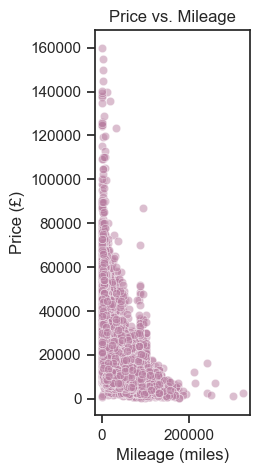

In [37]:
sns.set_style("ticks")


plt.figure(figsize=(2, 5))
sns.scatterplot(x='mileage', y='price', data=df_train, alpha=0.5, color="#B87EA1")
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (£)')

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

We understand that these two features are positively correlated. The cars with the highest selling price are the most recent ones, as a whole.

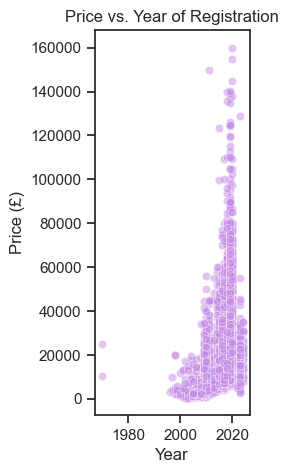

In [38]:
plt.figure(figsize=(2, 5))
sns.scatterplot(x='year', y='price', data=df_train, alpha=0.5, color='#C48AE6')
plt.title('Price vs. Year of Registration')
plt.xlabel('Year')
plt.ylabel('Price (£)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

BMW and Mercedes have the highest median value, while VW and Audi have a large price range. Opel and Toyota appear to be the most accecible brands.

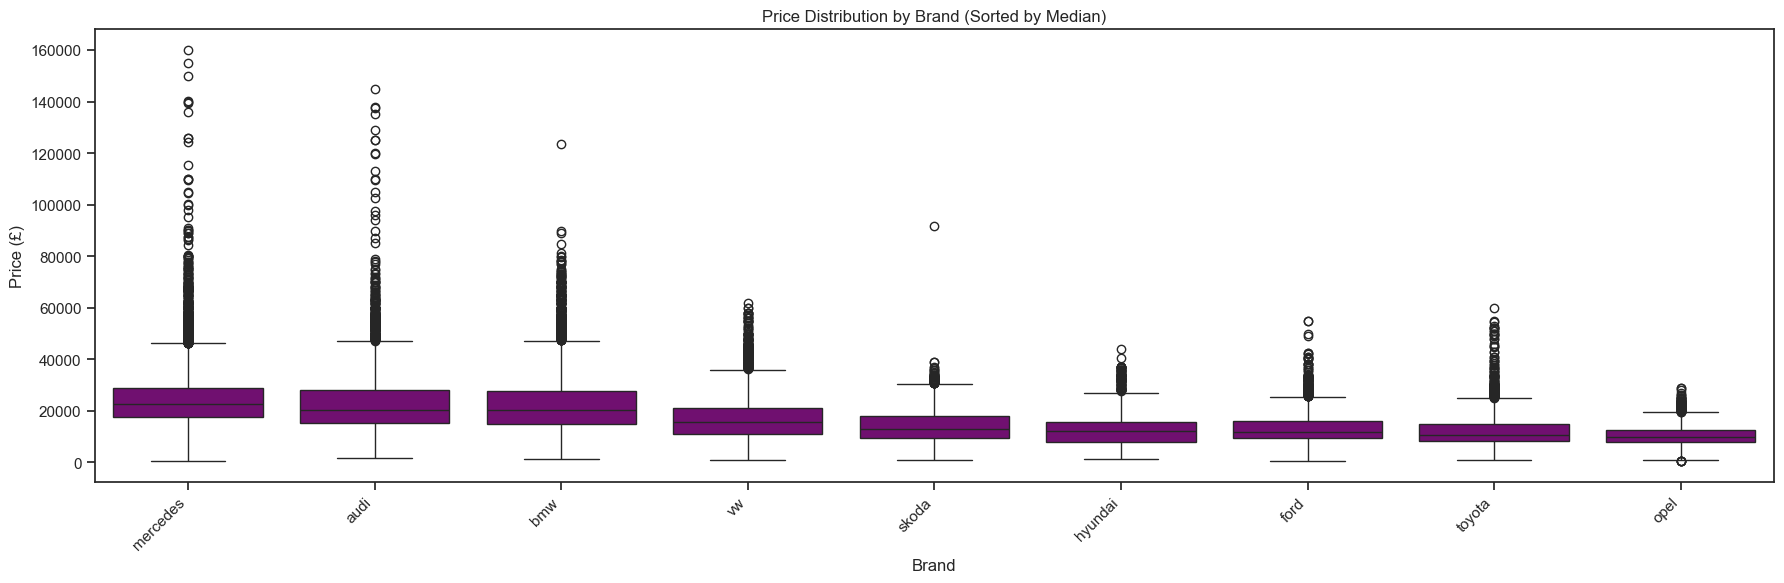

In [39]:
plt.figure(figsize=(18, 6))

median_price = df_train.groupby('Brand')['price'].median().sort_values(ascending=False)

sns.boxplot(x='Brand', y='price', data=df_train, order=median_price.index, color='purple')
plt.title('Price Distribution by Brand (Sorted by Median)')
plt.xlabel('Brand')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')

In [40]:
X = df_train.drop('price', axis = 1)
y = df_train['price']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


metric_features.remove('price')
print(metric_features)

print(X_train.shape)
print(y_train.shape)





['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'has_reportedDamage']
(60775, 13)
(60775,)


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Outlier Analysis on Numerical Variables
<h3>

In [41]:
metric_features

['year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'has_reportedDamage']

### IQR

Checking by the standard IQR analysis the outliers that are present in our variable.

In [42]:

for col in metric_features:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(X_train):.2%})")
    

year: 1362 outliers (2.24%)
mileage: 2573 outliers (4.23%)
tax: 15953 outliers (26.25%)
mpg: 922 outliers (1.52%)
engineSize: 520 outliers (0.86%)
paintQuality%: 0 outliers (0.00%)
previousOwners: 0 outliers (0.00%)
has_reportedDamage: 1240 outliers (2.04%)


In [43]:
def analyze_outliers(df, numerical_cols):
    """
    Analisa outliers em features numéricas usando múltiplas métricas
    """
    print("="*80)
    print("ANÁLISE DE OUTLIERS")
    print("="*80)
    
    outlier_summary = []
    
    for col in numerical_cols:
        print(f"\n{'='*80}")
        print(f"Feature: {col.upper()}")
        print(f"{'='*80}")
        
        # Estatísticas descritivas
        stats = df[col].describe()
        print(f"\nEstatísticas Básicas:")
        print(stats)
        
        # Percentis adicionais
        p99 = df[col].quantile(0.99)
        p95 = df[col].quantile(0.95)
        p05 = df[col].quantile(0.05)
        p01 = df[col].quantile(0.01)
        
        print(f"\nPercentis:")
        print(f"  P01: {p01:.2f}")
        print(f"  P05: {p05:.2f}")
        print(f"  P95: {p95:.2f}")
        print(f"  P99: {p99:.2f}")
        
        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_iqr = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers_pct = (outliers_iqr / len(df)) * 100
        
        print(f"\nMétodo IQR (1.5x):")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")
        print(f"  Outliers: {outliers_iqr} ({outliers_pct:.2f}%)")
        
        # Z-score method (valores > 3 desvios padrão)
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers_z = (z_scores > 3).sum()
        outliers_z_pct = (outliers_z / len(df)) * 100
        
        print(f"\nMétodo Z-score (|z| > 3):")
        print(f"  Outliers: {outliers_z} ({outliers_z_pct:.2f}%)")
        
        outlier_summary.append({
            'feature': col,
            'mean': df[col].mean(),
            'median': df[col].median(),
            'std': df[col].std(),
            'min': df[col].min(),
            'max': df[col].max(),
            'p01': p01,
            'p99': p99,
            'iqr_outliers': outliers_iqr,
            'iqr_outliers_pct': outliers_pct,
            'z_outliers': outliers_z,
            'z_outliers_pct': outliers_z_pct
        })
    
    return pd.DataFrame(outlier_summary)

analyze_outliers(X_train, metric_features)

ANÁLISE DE OUTLIERS

Feature: YEAR

Estatísticas Básicas:
count    59573.000000
mean      2017.092811
std          2.198677
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2024.000000
Name: year, dtype: float64

Percentis:
  P01: 2009.00
  P05: 2013.00
  P95: 2019.00
  P99: 2020.00

Método IQR (1.5x):
  Lower bound: 2011.50
  Upper bound: 2023.50
  Outliers: 1362 (2.24%)

Método Z-score (|z| > 3):
  Outliers: 1059 (1.74%)

Feature: MILEAGE

Estatísticas Básicas:
count     59299.000000
mean      23304.276528
std       21619.235565
min           1.000000
25%        7500.000000
50%       17372.000000
75%       32469.000000
max      323000.000000
Name: mileage, dtype: float64

Percentis:
  P01: 10.00
  P05: 1000.00
  P95: 66927.10
  P99: 98000.00

Método IQR (1.5x):
  Lower bound: -29953.50
  Upper bound: 69922.50
  Outliers: 2573 (4.23%)

Método Z-score (|z| > 3):
  Outliers: 987 (1.62%)

Feature: TAX

Estatísticas Básicas:
count    54167.

,feature,mean,median,std,min,max,p01,p99,iqr_outliers,iqr_outliers_pct,z_outliers,z_outliers_pct
0,year,2017.092811,2017.0,2.198677,1996.000000,2024.000000,2009.0,2020.000000,1362,2.241053,1059,1.742493
1,mileage,23304.276528,17372.0,21619.235565,1.000000,323000.000000,10.0,98000.000000,2573,4.233649,987,1.624023
2,tax,121.378968,145.0,64.620338,0.000000,580.000000,0.0,300.000000,15953,26.249280,341,0.561086
3,mpg,55.190437,54.3,16.392194,1.100000,470.800000,28.0,89.773693,922,1.517071,373,0.613739
4,engineSize,1.667417,1.6,0.566192,0.154529,6.600000,1.0,3.000000,520,0.855615,520,0.855615
5,paintQuality%,64.639156,65.0,21.013271,1.638913,125.594308,30.0,99.000000,0,0.000000,0,0.000000
6,previousOwners,2.002704,2.0,1.446448,0.000000,6.000000,0.0,4.000000,0,0.000000,0,0.000000
7,has_reportedDamage,0.979597,1.0,0.141376,0.000000,1.000000,0.0,1.000000,1240,2.040313,1240,2.040313


In [44]:
def remove_outliers_smart(X_train, X_val, y_train, y_val):
    """
    Estratégia conservadora mas eficaz
    """
    X_tr = X_train.copy()
    X_v = X_val.copy()
    y_tr = y_train.copy()
    y_v = y_val.copy()
    
    print("Antes:", len(X_tr), "train,", len(X_v), "val")
    
    # 1. YEAR: Remove carros muito antigos (< 2000)
    if 'year' in X_tr.columns:
        mask_tr = X_tr['year'] >= 2000
        mask_v = X_v['year'] >= 2000
        print(f"Year < 2000: removidos {(~mask_tr).sum()} train, {(~mask_v).sum()} val")
        X_tr, y_tr = X_tr[mask_tr], y_tr[mask_tr]
        X_v, y_v = X_v[mask_v], y_v[mask_v]
    
    # 2. MILEAGE: Cap em 150k milhas
    if 'mileage' in X_tr.columns:
        train_above = (X_tr['mileage'] > 150000).sum()
        val_above = (X_v['mileage'] > 150000).sum()
        print(f"Mileage > 150k: cappados {train_above} train, {val_above} val")
        X_tr['mileage'] = np.clip(X_tr['mileage'], 0, 150000)
        X_v['mileage'] = np.clip(X_v['mileage'], 0, 150000)
    
    # 3. MPG: Cap em 100 mpg
    if 'mpg' in X_tr.columns:
        train_above = (X_tr['mpg'] > 100).sum()
        val_above = (X_v['mpg'] > 100).sum()
        print(f"MPG > 100: cappados {train_above} train, {val_above} val")
        X_tr['mpg'] = np.clip(X_tr['mpg'], 0, 100)
        X_v['mpg'] = np.clip(X_v['mpg'], 0, 100)
    
    # 4. TAX: Cap em P99 (£300)
    if 'tax' in X_tr.columns:
        upper_tax = X_train['tax'].quantile(0.99)
        train_above = (X_tr['tax'] > upper_tax).sum()
        val_above = (X_v['tax'] > upper_tax).sum()
        print(f"Tax > {upper_tax:.0f}: cappados {train_above} train, {val_above} val")
        X_tr['tax'] = np.clip(X_tr['tax'], 0, upper_tax)
        X_v['tax'] = np.clip(X_v['tax'], 0, upper_tax)
    
    print("Depois:", len(X_tr), "train,", len(X_v), "val")
    print(f"Removidos: {len(X_train) - len(X_tr)} train ({100*(len(X_train)-len(X_tr))/len(X_train):.2f}%)")
    
    return X_tr, X_v, y_tr, y_v

# Aplicar
X_tr_clean, X_v_clean, y_tr_clean, y_v_clean = remove_outliers_smart(
    X_train, X_val, y_train, y_val
)

Antes: 60775 train, 15194 val
Year < 2000: removidos 1213 train, 293 val
Mileage > 150k: cappados 29 train, 5 val
MPG > 100: cappados 397 train, 103 val
Tax > 300: cappados 433 train, 110 val
Depois: 59562 train, 14901 val
Removidos: 1213 train (2.00%)


Setting the training set to its' form with the outlier treatment.

In [45]:
X_train=X_tr_clean
X_val=X_v_clean

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Missing Values Treatment
 <h3>

In [46]:
#slight correction of NaN values that werent marked as real NaN
for df in [X_train, X_val, X_test]:
    df.replace(["nan", "NaN", "None", "", " "], np.nan, inplace=True)

Tax can depend on the size of the car (understandable by the 'model', if SUV, town car, etc.) and on the 'fuelType' they use, since nowadays, electric cars have several benefits.

Similar cars, by the same manufacturer, usually have the same 'mileage'. Consequently, let us use that knowledge to fill in the missing values. On the other hand, KNN filling would create a bias due to the high skewness in the distribution of this variable.

The type of engine depends solely on the manufacturer of the car

The measure of 'mpg' (miles per galon) is highly related to which fuel type the car is using, the type of car and the size of the engine.

In [47]:
min_samples = 5


# --- Estatísticas para 'mpg' e 'tax' ---

# Nível 1: Brand, model, fuelType. FIX: Retorna pd.Series de NaNs para grupos pequenos.
group_median_full_mpg_tax = (
    X_train.groupby(["Brand", "model", "fuelType"])[["mpg", "tax"]]
    .apply(lambda x: x.median() if len(x) >= min_samples else pd.Series({'mpg': np.nan, 'tax': np.nan}))
)

# Nível 2: Brand, fuelType (Calculamos Series separadas para facilitar o .get() nos fallbacks)
group_median_tax_brandfuel = X_train.groupby(["Brand", "fuelType"])["tax"].median()
group_median_mpg_brandfuel = X_train.groupby(["Brand", "fuelType"])["mpg"].median()

# Nível 3: Global
global_tax_median = X_train["tax"].median()
global_mpg_median = X_train["mpg"].median()


# --- Estatísticas para 'engineSize' ---
# Nível 1: Brand, model
group_median_engine_full = (
    X_train.groupby(["Brand", "model"])["engineSize"]
    .apply(lambda x: x.median() if len(x) >= min_samples else np.nan)
)

# Nível 2: Brand
group_median_engine_brand = X_train.groupby("Brand")["engineSize"].median()

# Nível 3: Global
global_engine_median = X_train["engineSize"].median()

# --- Estatísticas para 'mileage' (Global) ---
global_mileage_median = X_train["mileage"].median()


def fill_tax(row):
    if pd.notna(row["tax"]):
        return row["tax"]
    
    key_full = (row["Brand"], row["model"], row["fuelType"])
    
    # 1. Tenta a mediana mais específica (Brand, model, fuelType)
    if key_full in group_median_full_mpg_tax.index:
        val = group_median_full_mpg_tax.loc[key_full, 'tax']
    else:
        val = np.nan # Grupo não existe no índice
    
    if pd.isna(val):
        key_brandfuel = (row["Brand"], row["fuelType"])
        # 2. Tenta a mediana mais geral (Brand, fuelType)
        val = group_median_tax_brandfuel.get(key_brandfuel, global_tax_median)
        
    # 3. Usa a mediana global como fallback final
    return val if pd.notna(val) else global_tax_median


def fill_mpg(row):
    if pd.notna(row["mpg"]):
        return row["mpg"]
    
    key_full = (row["Brand"], row["model"], row["fuelType"])
    
    # 1. Tenta a mediana mais específica (Brand, model, fuelType)
    if key_full in group_median_full_mpg_tax.index:
        val = group_median_full_mpg_tax.loc[key_full, 'mpg']
    else:
        val = np.nan # Grupo não existe no índice
    
    if pd.isna(val):
        key_brandfuel = (row["Brand"], row["fuelType"])
        # 2. Tenta a mediana mais geral (Brand, fuelType)
        val = group_median_mpg_brandfuel.get(key_brandfuel, global_mpg_median)
        
    # 3. Usa a mediana global como fallback final
    return val if pd.notna(val) else global_mpg_median


def fill_engineSize(row):
    if pd.notna(row["engineSize"]):
        return row["engineSize"]
    
    key_model = (row["Brand"], row["model"])
    
    # 1. Tenta a mediana mais específica (Brand, model)
    val = group_median_engine_full.get(key_model)
    
    if pd.isna(val):
        key_brand = row["Brand"]
        # 2. Tenta a mediana por Brand
        val = group_median_engine_brand.get(key_brand, global_engine_median)
        
    # 3. Usa a mediana global como fallback final
    return val if pd.notna(val) else global_engine_median


# --- Aplicação de 'tax' ---
X_train["tax"] = X_train.apply(fill_tax, axis=1)
X_val["tax"] = X_val.apply(fill_tax, axis=1)
X_test["tax"] = X_test.apply(fill_tax, axis=1)

# --- Aplicação de 'mpg' ---
X_train["mpg"] = X_train.apply(fill_mpg, axis=1)
X_val["mpg"] = X_val.apply(fill_mpg, axis=1)
X_test["mpg"] = X_test.apply(fill_mpg, axis=1)

# --- Aplicação de 'engineSize' ---
X_train["engineSize"] = X_train.apply(fill_engineSize, axis=1)
X_val["engineSize"] = X_val.apply(fill_engineSize, axis=1)
X_test["engineSize"] = X_test.apply(fill_engineSize, axis=1)

# --- Aplicação de 'mileage' (Mediana Global) ---
X_train["mileage"].fillna(global_mileage_median, inplace=True)
X_val["mileage"].fillna(global_mileage_median, inplace=True)
X_test["mileage"].fillna(global_mileage_median, inplace=True)

In [48]:
group_median_model = (
    X_train.groupby(["Brand", "model"])["year"]
    .apply(lambda x: x.median() if len(x) >= min_samples else np.nan)
)

group_median_brand = X_train.groupby("Brand")["year"].median()

global_median = X_train["year"].median()

# auxiliar
def fill_year(row):
    if pd.notna(row["year"]):
        return row["year"]
    val = group_median_model.get((row["Brand"], row["model"]))
    if pd.isna(val):
        val = group_median_brand.get(row["Brand"], global_median)
    return val if pd.notna(val) else global_median

# 
X_train["year"] = X_train.apply(fill_year, axis=1)
X_val["year"] = X_val.apply(fill_year, axis=1)
X_test["year"] = X_test.apply(fill_year, axis=1)


Creation of a KNN imputer to fill in the missing values based on the nearest neighbor in the not NaN categories that exist. Therefore we are finding the closest match possible to the data missing

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
def fill_knn(df, column, categorical_cols=['Brand', 'model'], numeric_cols=None, k=5,
             fit=True, encoders=None, imputer=None, scaler=None):

    df_copy = df.copy()  # Make a copy of the DataFrame to avoid changing the original one

    # 1. Prepare categorical encoders
    if fit:  # If we are fitting on the training data
        encoders = {}  # Dictionary to store LabelEncoders for each categorical column
        for col in categorical_cols + [column]:  # Loop through all categorical columns + target column
            if df_copy[col].dtype == "object":  # Check if the column is categorical
                le = LabelEncoder()  # Initialize LabelEncoder
                non_null_mask = df_copy[col].notna()  # Identify non-missing values
                # Encode only non-missing values
                df_copy.loc[non_null_mask, col] = le.fit_transform(df_copy.loc[non_null_mask, col].astype(str))
                encoders[col] = le  # Save the encoder for later use
    else:  # If we are transforming new data (test set)
        for col, le in encoders.items():  # Use the existing encoders fitted on the training data
            if col in df_copy.columns:
                non_null_mask = df_copy[col].notna()  # Identify non-missing values
                df_copy.loc[non_null_mask, col] = df_copy.loc[non_null_mask, col].astype(str)
                # Handle unseen categories by replacing them with the first known class
                df_copy[col] = df_copy[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
                df_copy[col] = le.transform(df_copy[col])  # Encode the categorical values

    # 2. Select subset (remove duplicates)
    subset_cols = list(dict.fromkeys(categorical_cols + (numeric_cols or []) + [column]))  # Unique list of relevant columns
    subset = df_copy[subset_cols]  # Subset with only relevant columns for imputation

    # 3. Standardize and Impute
    if fit:  # If we are fitting for the first time (training)
        scaler = StandardScaler()  # Standardize numerical data to mean=0, std=1
        imputer = KNNImputer(n_neighbors=k, weights='distance')  # Initialize KNN imputer
        scaled = scaler.fit_transform(subset)  # Fit and transform the data
        imputed = imputer.fit_transform(scaled)  # Perform KNN imputation
    else:  # If applying on new data (test)
        scaled = scaler.transform(subset)  # Scale using the same scaler
        imputed = imputer.transform(scaled)  # Apply the same imputer

    # 4. Inverse transform + replace
    subset_imputed = pd.DataFrame(scaler.inverse_transform(imputed), columns=subset_cols, index=df.index)  # Return data to original scale
    missing_mask = df[column].isna()  # Identify missing values in the target column

    # If the imputed column is categorical
    if column in encoders and df[column].dtype == "object":
        # Convert numeric codes back to original labels
        inv = encoders[column].inverse_transform(subset_imputed[column].round().astype(int))
        df.loc[missing_mask, column] = inv[missing_mask]  # Fill missing values with decoded labels
    else:
        # For numeric columns, fill missing values directly
        df.loc[missing_mask, column] = subset_imputed.loc[missing_mask, column]

    return df, encoders, imputer, scaler  # Return the filled DataFrame and fitted transformers

# Apply to the sets
X_train, enc_trans, imp_trans, sc_trans = fill_knn(
    X_train, 'transmission', ['Brand', 'model', 'fuelType'], metric_features, fit=True
)
X_train, enc_fuel, imp_fuel, sc_fuel = fill_knn(
    X_train, 'fuelType', ['Brand', 'model', 'transmission'], metric_features, fit=True
)
X_train, enc_paint, imp_paint, sc_paint = fill_knn(
    X_train, 'paintQuality%', ['Brand','model','transmission','fuelType'], metric_features, fit=True
)


X_val, _, _, _ = fill_knn(
    X_val, 'transmission', ['Brand', 'model', 'fuelType'], metric_features,
    fit=False, encoders=enc_trans, imputer=imp_trans, scaler=sc_trans
)
X_val, _, _, _ = fill_knn(
    X_val, 'fuelType', ['Brand', 'model', 'transmission'], metric_features,
    fit=False, encoders=enc_fuel, imputer=imp_fuel, scaler=sc_fuel
)
X_val, _, _, _ = fill_knn(
    X_val, 'paintQuality%', ['Brand','model','transmission','fuelType'], metric_features,
    fit=False, encoders=enc_paint, imputer=imp_paint, scaler=sc_paint
)


X_test, _, _, _ = fill_knn(
    X_test, 'transmission', ['Brand', 'model', 'fuelType'], metric_features,
    fit=False, encoders=enc_trans, imputer=imp_trans, scaler=sc_trans
)
X_test, _, _, _ = fill_knn(
    X_test, 'fuelType', ['Brand', 'model', 'transmission'], metric_features,
    fit=False, encoders=enc_fuel, imputer=imp_fuel, scaler=sc_fuel
)
X_test, _, _, _ = fill_knn(
    X_test, 'paintQuality%', ['Brand','model','transmission','fuelType'], metric_features,
    fit=False, encoders=enc_paint, imputer=imp_paint, scaler=sc_paint
)



In [50]:
X_train, enc_paint, imp_paint, sc_paint = fill_knn(
    X_train, 'model', ['Brand','transmission','fuelType'], metric_features, fit=True
)

X_val, _, _, _ = fill_knn(
    X_val, 'model', ['Brand','transmission','fuelType'], metric_features,
    fit=False, encoders=enc_paint, imputer=imp_paint, scaler=sc_paint
)

X_test, _, _, _ = fill_knn(
    X_test, 'model', ['Brand','transmission','fuelType'], metric_features,
    fit=False, encoders=enc_paint, imputer=imp_paint, scaler=sc_paint
)

print(X_train.isna().sum())
print(X_val.isna().sum())
print(X_test.isna().sum())
X_train['model'].unique()



Brand                 1198
model                    0
year                     0
transmission             0
mileage                  0
fuelType                 0
tax                      0
mpg                      0
engineSize               0
paintQuality%            0
previousOwners        1213
hasDamage                0
has_reportedDamage       0
dtype: int64
Brand                 289
model                   0
year                    0
transmission            0
mileage                 0
fuelType                0
tax                     0
mpg                     0
engineSize              0
paintQuality%           0
previousOwners        310
hasDamage               0
has_reportedDamage      0
dtype: int64
Brand                 649
model                   0
year                    0
transmission            0
mileage                 0
fuelType                0
tax                     0
mpg                     0
engineSize              0
paintQuality%           0
previousOwners        597

array(['gleclass', 'tucson', 'fiesta', 'x1', 'ecosport', 'sq5', 'clclass',
       'series3', 'ix35', 'mokka', 'q2', 'aygo', 'a5', 'karoq', 'focus',
       'insignia', 'auris', 'kamiq', 'a1', 'golfsv', 'yaris', 'astra',
       'series4', 'tiguan', 'vclass', 'polo', 'sq7', 'claclass', 'kuga',
       'glaclass', 'up', 'tcross', 'corsa', 'ka', 'series1', 'a3', 'q3',
       'santafe', 'fabia', 'kona', 'ioniq', 'rapid', 'touareg', 'cmax',
       'bmax', 'superb', 'slc', 'rav4', 'octavia', 'troc', 'vivaro',
       'citigo', 'ix20', 'tourneocustom', 'passat', 'r8', 'm4', 'series2',
       'galaxy', 'verso', 'kodiaq', 'bclass', 'zafira', 'edge', 'mondeo',
       'rs3', 'clsclass', 'slclass', 'glcclass', 'prius', 'x4', 'avensis',
       'adam', 'grandlandx', 'tt', 'i10', 'series5', 'arteon',
       'caravelle', 'golf', 'touran', 'glbclass', 'chr', 'z4', 'meriva',
       'cc', 'slkclass', 'hilux', 'a6', 'i30', 'q8', 'crosslandx', 'yeti',
       'amarok', 'antara', 'corolla', 'sharan', 'x7', 'xcla

Lets fix the NaNs values in 'Brand' by the model they are associated with (we know each model is designed by one unique and single brand).

In [51]:
mask_nanBrand = X_train["Brand"].isna()

toyota=["YARIS", "AYGO", "COROLLA", "CHR", "AVENSIS", "PRIUS","RAV4", "HILUX", "VERSO", "SUPRA", "LANDCRUISER","CAMRY", "PROACEVERSO", "URBANCRUISER", "AURIS", "GT86"]
toyota_brand=[x.lower() for x in toyota]

ford=["FOCUS", "FIESTA", "MONDEO", "KUGA", "GALAXY", "SMAX", "BMAX","ECOSPORT", "PUMA", "TOURNEOCUSTOM", "TOURNEOCONNECT","GRANDTOURNEOCONNECT", "CMAX", "GRANDCMAX", "EDGE","MUSTANG", "FUSION", "STREETKA", "RANGER", "ESCORT", "KA","KA+"]
ford_brand=[x.lower() for x in ford]

opel=["CORSA","MOKKAX", "ASTRA", "INSIGNIA", "MOKKA", "ZAFIRA", "VIVA","MERIVA", "ADAM", "COMBOLIFE", "CROSSLANDX", "GRANDLANDX","GTC", "ANTARA", "VIVARO", "VECTRA", "AGILA", "TIGRA","CASCADA", "AMPERA"]
opel_brand=[x.lower() for x in opel]

vw=["GOLF", "GOLFSV", "POLO", "PASSAT", "TIGUAN", "TIGUANALLSPACE","TOURAN", "TOUAREG", "TROC", "TCROSS", "ARTEON", "SHARAN","JETTA", "CC", "CARAVELLE", "CALIFORNIA", "CADDY", "CADDYMAXI","BEETLE", "SCIROCCO", "UP", "AMAROK", "EOS", "FOX"]
vw_brand=[x.lower() for x in vw]

audi=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8","Q2", "Q3", "Q5", "Q7", "Q8", "S3", "S4", "S5", "S8","RS3", "RS4", "RS5", "RS6", "SQ5", "SQ7", "TT", "R8"]
audi_brand=[x.lower() for x in audi]

mercedes=["ACLASS", "BCLASS", "CCLASS", "ECLASS", "SCLASS","CLACLASS", "CLSCLASS", "GLACLASS", "GLBCLASS","GLCCLASS", "GLECLASS", "GLSCLASS", "GLCLASS","GCLASS", "VCLASS", "XCLASS", "SLCLASS", "SLKCLASS","MCLASS","SLC", "CLK", "CLCLASS", "CLCCLASS","MERCEDES200", "MERCEDES220", "MERCEDES230"]
mercedes_brand=[x.lower() for x in mercedes]

skoda=["FABIA", "OCTAVIA", "SUPERB", "KAROQ", "KODIAQ", "KAMIQ","YETI","YETIOUTDOOR", "SCALA", "RAPID", "CITIGO", "ROOMSTER"]
skoda_brand=[x.lower() for x in skoda]

h=["I10", "I20", "I30", "I40", "I800", "IONIQ", "KONA", "TUCSON","SANTAFE", "GETZ", "IX20", "IX35", "VELOSTER", "ACCENT", "TERRACAN"]
h_brand=[x.lower() for x in h]



X_train.loc[mask_nanBrand, "Brand"] = X_train.loc[mask_nanBrand, "model"].apply(
    lambda m: (
        "toyota" if pd.notna(m) and m in toyota_brand
        else "ford" if pd.notna(m) and m in ford_brand
        else "opel" if pd.notna(m) and m in opel_brand
        else "vw" if pd.notna(m) and m in vw_brand
        else "audi" if pd.notna(m) and m in audi_brand
        else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
                                            "series6", "series7", "series8", "x1", "x2", "x3", "x4",
                                            "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
        else "mercedes" if pd.notna(m) and m in mercedes_brand
        else "skoda" if pd.notna(m) and m in skoda_brand
        else "hyundai" if pd.notna(m) and m in h_brand
        else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
        else "renault" if pd.notna(m) and m in ["kadjar"]
        else "honda" if pd.notna(m) and m in ["shuttle"]
        else None
    )
)
mask_nanBrandV = X_val["Brand"].isna()

X_val.loc[mask_nanBrandV, "Brand"] = X_val.loc[mask_nanBrandV, "model"].apply(
    lambda m: (
        "toyota" if pd.notna(m) and m in toyota_brand
        else "ford" if pd.notna(m) and m in ford_brand
        else "opel" if pd.notna(m) and m in opel_brand
        else "vw" if pd.notna(m) and m in vw_brand
        else "audi" if pd.notna(m) and m in audi_brand
        else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
                                            "series6", "series7", "series8", "x1", "x2", "x3", "x4",
                                            "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
        else "mercedes" if pd.notna(m) and m in mercedes_brand
        else "skoda" if pd.notna(m) and m in skoda_brand
        else "hyundai" if pd.notna(m) and m in h_brand
        else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
        else "renault" if pd.notna(m) and m in ["kadjar"]
        else "honda" if pd.notna(m) and m in ["shuttle"]
        else None
    )
)

mask_nanBrandT = X_test["Brand"].isna()

X_test.loc[mask_nanBrandT, "Brand"] = X_test.loc[mask_nanBrandT, "model"].apply(
    lambda m: (
        "toyota" if pd.notna(m) and m in toyota_brand
        else "ford" if pd.notna(m) and m in ford_brand
        else "opel" if pd.notna(m) and m in opel_brand
        else "vw" if pd.notna(m) and m in vw_brand
        else "audi" if pd.notna(m) and m in audi_brand
        else "bmw" if pd.notna(m) and m in ["series1", "series2", "series3", "series4", "series5",
                                            "series6", "series7", "series8", "x1", "x2", "x3", "x4",
                                            "x5", "x6", "x7", "z3", "z4", "m2", "m3", "m4", "m5", "m6", 'iq']
        else "mercedes" if pd.notna(m) and m in mercedes_brand
        else "skoda" if pd.notna(m) and m in skoda_brand
        else "hyundai" if pd.notna(m) and m in h_brand
        else "seat" if pd.notna(m) and m in ["leon", "ateca", "toledo", "arona", "ibiza", "alhambra"]
        else "renault" if pd.notna(m) and m in ["kadjar"]
        else "honda" if pd.notna(m) and m in ["shuttle"]
        else None
    )
)

X_test.isna().sum()


Brand                   0
model                   0
year                    0
transmission            0
mileage                 0
fuelType                0
tax                     0
mpg                     0
engineSize              0
paintQuality%           0
previousOwners        597
hasDamage               0
has_reportedDamage      0
dtype: int64

In [52]:
X_train[X_train["Brand"].isna()]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,has_reportedDamage
carID,,,,,,,,,,,,,


In [53]:
X_test[X_test['Brand'].isna()]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,has_reportedDamage
carID,,,,,,,,,,,,,


All the NaN left in 'Brand' come from observations in which 'model' is also unknown.

In [54]:
print(X_train.isna().sum())
print(X_val.isna().sum())
print(X_test.isna().sum())
X_val["Brand"].unique()


Brand                    0
model                    0
year                     0
transmission             0
mileage                  0
fuelType                 0
tax                      0
mpg                      0
engineSize               0
paintQuality%            0
previousOwners        1213
hasDamage                0
has_reportedDamage       0
dtype: int64
Brand                   0
model                   0
year                    0
transmission            0
mileage                 0
fuelType                0
tax                     0
mpg                     0
engineSize              0
paintQuality%           0
previousOwners        310
hasDamage               0
has_reportedDamage      0
dtype: int64
Brand                   0
model                   0
year                    0
transmission            0
mileage                 0
fuelType                0
tax                     0
mpg                     0
engineSize              0
paintQuality%           0
previousOwners        597

array(['hyundai', 'bmw', 'toyota', 'vw', 'ford', 'skoda', 'audi', 'opel',
       'mercedes'], dtype=object)

In [55]:
#keeping the number of observations equal for coherence
car_ids=X_train.index
y_train=y_train.loc[car_ids]
y_train.shape


car_idsV=X_val.index
y_val=y_val[car_idsV]

Filling in 'previousOwners' with the same thought process as the first functions.

In [56]:
group_median_full = (
    X_train.groupby(["Brand", "model", "fuelType"])["previousOwners"]
    .apply(lambda x: x.median() if len(x) >= min_samples else np.nan)
)


group_median_brandfuel = X_train.groupby(["Brand", "fuelType"])["previousOwners"].median()


global_median = X_train["previousOwners"].median()

def fill_prevowners(row):
    if pd.notna(row["previousOwners"]):
        return row["previousOwners"]
    val = group_median_full.get((row["Brand"], row["model"], row["fuelType"]))
    if pd.isna(val):
        val = group_median_brandfuel.get((row["Brand"], row["fuelType"]), global_median)
    return val if pd.notna(val) else global_median


X_train["previousOwners"] = X_train.apply(fill_prevowners, axis=1)

X_val["previousOwners"] = X_val.apply(fill_prevowners, axis=1)

X_test["previousOwners"] = X_test.apply(fill_prevowners, axis=1)

In [57]:
print(X_train.isna().sum())
print(X_val.isna().sum())
print(X_test.isna().sum())


Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
hasDamage             0
has_reportedDamage    0
dtype: int64
Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
hasDamage             0
has_reportedDamage    0
dtype: int64
Brand                 0
model                 0
year                  0
transmission          0
mileage               0
fuelType              0
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
hasDamage             0
has_reportedDamage    0
dtype: int64


<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
3. Feature Engineering
</h2>

'car_age': represents how old the car is.

In [58]:
X_train['car_age']=2025-X_train['year']
X_val['car_age']=2025-X_val['year']
X_test['car_age']=2025-X_test['year']

'mileage_per_year': normalises car usage per year.

In [59]:
X_train['mileage_per_year'] = X_train['mileage'] / (X_train['car_age'] + 1)
X_val['mileage_per_year'] = X_val['mileage'] / (X_val['car_age'] + 1)
X_test['mileage_per_year'] = X_test['mileage'] / (X_test['car_age'] + 1)

'is_eco': dummy variable representing if a car is environmentally friendly.

In [60]:
eco_fuels = ['electric', 'hybrid']
X_train['is_eco'] = X_train['fuelType'].str.lower().isin(eco_fuels).astype(int)
X_val['is_eco'] = X_val['fuelType'].str.lower().isin(eco_fuels).astype(int)
X_test['is_eco'] = X_test['fuelType'].str.lower().isin(eco_fuels).astype(int)


'is_luxury': dummy variable that highligths more expensive brands.

In [61]:
luxury_brands = ["bmw", "audi", "mercedes"]
X_train["is_luxury"] = X_train["Brand"].str.lower().isin(luxury_brands).astype(int)
X_val["is_luxury"] = X_val["Brand"].str.lower().isin(luxury_brands).astype(int)
X_test["is_luxury"] = X_test["Brand"].str.lower().isin(luxury_brands).astype(int)

'mileage_bin': mileage discretized into five intervals representing typical usage stages.

In [62]:
mileage_bins = [0, 10000, 50000, 100000, 150000, np.inf]
mileage_labels = ['0-10k', '10k-50k', '50k-100k', '100k-150k', '150k+']

X_train['mileage_bin'] = pd.cut(
    X_train['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)
X_val['mileage_bin'] = pd.cut(
    X_val['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)

X_test['mileage_bin'] = pd.cut(
    X_test['mileage'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)

'tax_to_engine_ratio': proxy for energy efficiency check

In [63]:
X_train["tax_to_engine_ratio"] = X_train["tax"] / X_train["engineSize"].replace(0, np.nan)
X_val["tax_to_engine_ratio"] = X_val["tax"] / X_val["engineSize"].replace(0, np.nan)
X_test["tax_to_engine_ratio"] = X_test["tax"] / X_test["engineSize"].replace(0, np.nan)

'age_squared': captures non linear effects of age

In [64]:
X_train['age_squared']=(X_train["car_age"])**2
X_val['age_squared']=(X_val["car_age"])**2
X_test['age_squared']=(X_test["car_age"])**2

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
4. Feature Selection
</h2>

We define a new object named a `X_train_num` where only the numerical variables are mantained, and a object named as `X_train_cat` with all the categorical independent variables.

In [65]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


# Repeat for Validation

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

# Update metric features
metric_features=X_train.columns.drop(cat_features).tolist()
print(metric_features)

['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'has_reportedDamage', 'car_age', 'mileage_per_year', 'is_eco', 'is_luxury', 'mileage_bin', 'tax_to_engine_ratio', 'age_squared']


Which scale to use?

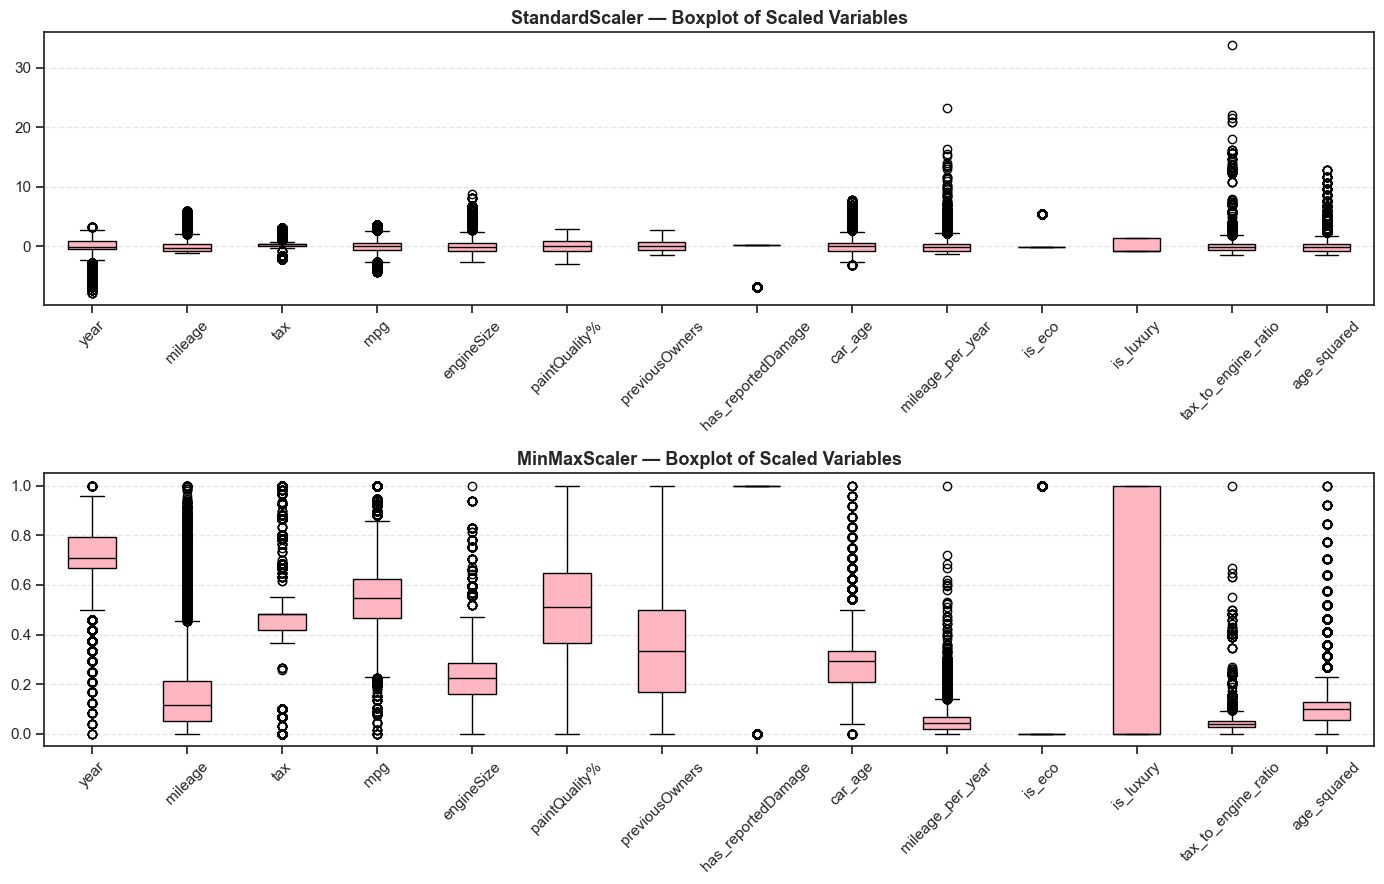

In [66]:
sns.set_style('ticks')

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 9))

if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

for ax, (name, scaler) in zip(axes, scalers.items()):
    scaled = scaler.fit_transform(X_train_num)
    df_scaled = pd.DataFrame(scaled, columns=X_train_num.columns, index=X_train_num.index)

    ax.boxplot(
        df_scaled.values,
        labels=df_scaled.columns,
        patch_artist=True,  
        boxprops=dict(facecolor="#FFB6C1", color="black"),  
        medianprops=dict(color="black"),                   
        whiskerprops=dict(color="black"),                  
        capprops=dict(color="black")                       
    )
    ax.set_title(f"{name} — Boxplot of Scaled Variables", fontsize=13, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


After comparing the results of different scaling methods through boxplots, the **StandardScaler** was selected as the most appropriate transformation for the project.

As shown in the visual comparison, MinMaxScaler compresses most variables towards the lower end of the scale (0–1 range) due to the presence of strong outliers, which distorts the original data distribution. In contrast, StandardScaler standardizes each feature by removing the mean and scaling to unit variance, resulting in more balanced and normally distributed variables without excessively flattening the data.

Normalizing the numerical data using the **StandardScaler** from sklearn. As the end result, the data obtained has 0 mean and 1 standard-deviation.

In [67]:
#call function
scaler = StandardScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[-0.9600287 , -0.30369731,  0.04219788, ...,  1.35131716,
        -0.37779454,  0.7536045 ],
       [-0.04411053,  0.40638979,  0.37960975, ..., -0.74001872,
         0.09149153, -0.07443815],
       [ 0.41384856, -0.36545427,  0.37960975, ..., -0.74001872,
         1.17875594, -0.41945593],
       ...,
       [-1.41798778, -0.21924738, -2.0666263 , ..., -0.74001872,
        -1.46174334,  1.23662938],
       [-0.50206961,  0.43408371, -1.72921443, ..., -0.74001872,
        -1.09753654,  0.31658199],
       [ 0.87180764, -0.86587909,  0.37960975, ..., -0.74001872,
         1.17875594, -0.71847133]])

In [68]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,has_reportedDamage,car_age,mileage_per_year,is_eco,is_luxury,tax_to_engine_ratio,age_squared
carID,,,,,,,,,,,,,,
46624,-0.960029,-0.303697,0.042198,0.497993,0.771237,0.160745,1.394167,0.144425,0.960029,-0.446265,-0.183732,1.351317,-0.377795,0.753604
34236,-0.044111,0.406390,0.379610,0.522404,0.060906,0.592169,-0.002403,0.144425,0.044111,0.587610,-0.183732,-0.740019,0.091492,-0.074438
27520,0.413849,-0.365454,0.379610,0.294570,-1.182173,0.496297,1.394167,0.144425,-0.413849,-0.237745,-0.183732,-0.740019,1.178756,-0.419456
10170,-0.960029,0.915495,0.042198,0.188790,0.593654,-1.229396,-1.398974,0.144425,0.960029,0.762443,-0.183732,1.351317,-0.323597,0.753604
17097,1.329767,-1.089837,0.463963,-0.315699,-1.182173,-1.181460,0.695882,0.144425,-1.329767,-1.224668,-0.183732,-0.740019,1.269808,-0.971484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41593,0.871808,-0.917964,0.379610,-0.787641,2.369481,0.927720,1.394167,0.144425,-0.871808,-0.957212,-0.183732,1.351317,-0.581577,-0.718471
19620,0.871808,-0.545677,0.379610,-1.430458,0.593654,0.304553,-0.002403,0.144425,-0.871808,-0.377221,-0.183732,-0.740019,-0.141494,-0.718471
54953,-1.417988,-0.219247,-2.066626,1.116400,-1.182173,1.407079,0.695882,0.144425,1.417988,-0.434563,-0.183732,-0.740019,-1.461743,1.236629


The scaling of the validation set should only consider information gained from the training data. 

In [69]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head()

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,has_reportedDamage,car_age,mileage_per_year,is_eco,is_luxury,tax_to_engine_ratio,age_squared
carID,,,,,,,,,,,,,,
32153,0.413849,-0.701084,0.379610,0.522404,0.060906,-1.325268,1.394167,0.144425,-0.413849,-0.695266,-0.183732,-0.740019,0.091492,-0.419456
14216,-1.875947,3.721215,0.379610,0.611910,0.593654,-0.030998,1.394167,0.144425,1.875947,2.810055,-0.183732,1.351317,-0.141494,1.765657
54177,2.703644,0.088452,-2.066626,1.116400,-1.182173,0.496297,-0.002403,0.144425,-2.703644,3.060710,-0.183732,-0.740019,-1.461743,-1.454509
65762,-0.502070,-0.459104,-1.560508,-0.161098,-0.471842,2.910661,1.394167,0.144425,0.502070,-0.537687,-0.183732,-0.740019,-1.071522,0.316582
25918,-0.044111,0.161391,-1.729214,0.497993,-1.182173,1.646758,-1.398974,0.144425,0.044111,0.290742,-0.183732,-0.740019,-1.097537,-0.074438


 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Categorical Variables Selection
 <h3>

In [70]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:#if p<alpha we reject the null and there is a relationship so the var is important for prediction
        result="{0} is IMPORTANT for Prediction".format(var)#
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)#independent H0
    print(result)

for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Brand is IMPORTANT for Prediction
model is IMPORTANT for Prediction
transmission is IMPORTANT for Prediction
fuelType is IMPORTANT for Prediction
hasDamage is IMPORTANT for Prediction
mileage_bin is IMPORTANT for Prediction


According to chi-square, we should not discard any variable.

 <h3 style="background-color:#8D8DE3; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
Numerical Variables Selection
 <h3>

### **Correlations**

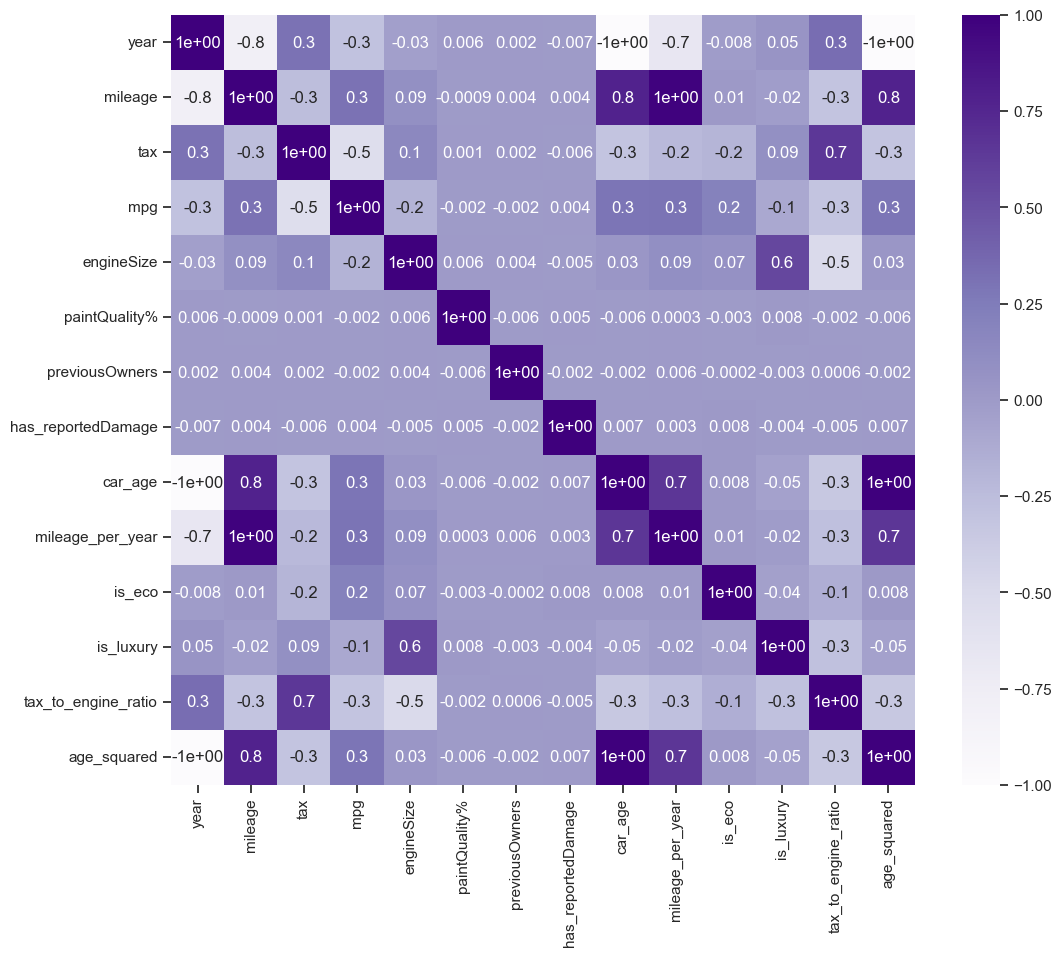

In [71]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Purples, fmt='.1')
    plt.show()
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are three pairs of variables highly correlated, namely:
    - 'mileage' vs 'car_age' (0.8) <br>
    - 'mileage' vs 'age_squared' (0.8) <br>
    - 'mileage_per_year' vs 'car_age' (0.7) <br>
    - 'mileage' vs 'year' (0.7) <br>
    - 'tax' vs 'tax_engine_ratio' (0.6) <br>

### **RFE**

In [72]:
y_train_log=np.log(y_train)
y_val_log=np.log(y_val)

Before RFE, we will check if the training and validation instances of the target variable are similiar in statistical metrics. If they behave in close proximity it means the predictions are reasonable.

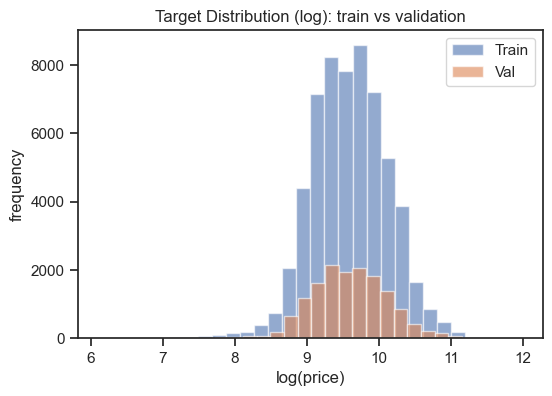

In [73]:
plt.figure(figsize=(6,4))
plt.hist(np.log(y_train), bins=30, alpha=0.6, label="Train")
plt.hist(np.log(y_val), bins=30, alpha=0.6, label="Val")
plt.legend()
plt.title("Target Distribution (log): train vs validation")
plt.xlabel("log(price)")
plt.ylabel("frequency")
plt.show()

This plot shows the distribution of the logarithm of car prices (`log(price)`) for both the training and validation sets. After applying the logarithmic transformation, the target variable follows an approximately normal distribution, which confirms that the transformation successfully reduced the original right skewness typical of raw price data. Both the train and validation sets exhibit very similar shapes and ranges, suggesting that the data split preserved the underlying price distribution, a good sign for model generalization. The concentration of most values between `log(price)` ~ 8.5 and 10.5 indicates that the majority of cars are within a consistent mid-range price segment, while very cheap or very expensive cars are rare.

We tried RFECV and normal RFE for the following results:

In [74]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train_log)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train_log)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val_log)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 0
Score with 0 features: 0.000000


In [75]:
def optimal_rfe(X, y, scoring='r2', cv=5, verbose=True):

    model = LinearRegression()
    n_features = X.shape[1]
    scores = []

    if verbose:
        print("Trying features")

    for n in range(1, n_features + 1):
        rfe = RFE(model, n_features_to_select=n)
        X_rfe = rfe.fit_transform(X, y)
        score = np.mean(cross_val_score(model, X_rfe, y, scoring=scoring, cv=cv))
        scores.append(score)

        if verbose:
            print(f"{n:2d} features -> {scoring}: {score:.4f}")

    best_n = np.argmax(scores) + 1
    best_score = scores[best_n - 1]

    best_rfe = RFE(model, n_features_to_select=best_n)
    best_rfe.fit(X, y)

    feature_ranking = (
        {feature: rank for feature, rank in zip(X.columns, best_rfe.ranking_)}
        if hasattr(X, "columns")
        else None
    )

    if verbose:
        print("\nBest number of features:", best_n)
        print("Best average score:", round(best_score, 4))
        if feature_ranking:
            print("Selected features:", X.columns[best_rfe.support_].tolist())

    return best_rfe, best_n, best_score, feature_ranking

optimal_rfe(X_train_num_scaled, y_train_log, scoring='r2', cv=5, verbose=True)

Trying features
 1 features -> r2: 0.3766
 2 features -> r2: 0.7139
 3 features -> r2: 0.7643
 4 features -> r2: 0.7968
 5 features -> r2: 0.7968
 6 features -> r2: 0.7968
 7 features -> r2: 0.8009
 8 features -> r2: 0.8102
 9 features -> r2: 0.8108
10 features -> r2: 0.8129
11 features -> r2: 0.8131
12 features -> r2: 0.8131
13 features -> r2: 0.8131
14 features -> r2: 0.8131

Best number of features: 13
Best average score: 0.8131
Selected features: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'has_reportedDamage', 'car_age', 'mileage_per_year', 'is_eco', 'is_luxury', 'tax_to_engine_ratio', 'age_squared']


(RFE(estimator=LinearRegression(), n_features_to_select=13),
 13,
 0.8131225773124695,
 {'year': 1,
  'mileage': 1,
  'tax': 1,
  'mpg': 1,
  'engineSize': 1,
  'paintQuality%': 1,
  'previousOwners': 2,
  'has_reportedDamage': 1,
  'car_age': 1,
  'mileage_per_year': 1,
  'is_eco': 1,
  'is_luxury': 1,
  'tax_to_engine_ratio': 1,
  'age_squared': 1})

### **LASSO**

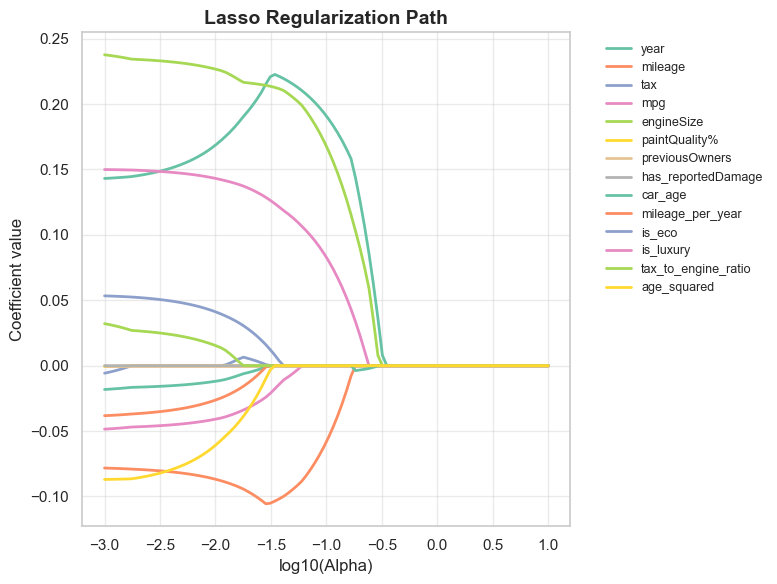

In [76]:
sns.set_theme(style="whitegrid")

alphas, coefs, _ = lasso_path(X_train_num_scaled, y_train_log, alphas=np.logspace(-3, 1, 100))

palette = sns.color_palette("Set2", n_colors=len(X_train_num_scaled.columns))

plt.figure(figsize=(8,6))
for i, (col, color) in enumerate(zip(X_train_num_scaled.columns, palette)):
    plt.plot(np.log10(alphas), coefs[i], label=col, color=color, linewidth=2)

plt.xlabel('log10(Alpha)', fontsize=12)
plt.ylabel('Coefficient value', fontsize=12)
plt.title('Lasso Regularization Path', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, frameon=False)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

When α is small, most coefficients are non-zero, meaning that the model includes almost all variables. As α increases, the L1 penalty forces less relevant or redundant variables to shrink toward zero, progressively simplifying the model.

In this case, the first features to be eliminated are those with weaker relationships to the target, such as `paintQuality%`, `previousOwners`, and `hasDamage`.
Conversely, the most persistent variables (`year`, `engineSize`, and `is_luxury`) remain active for a wide range of α values, indicating that they are the strongest predictors of car price.

In [77]:
reg=LassoCV()

In [78]:
reg.fit(X_train_num_scaled, y_train_log)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [79]:
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

year                   0.158819
mileage               -0.077560
tax                   -0.010965
mpg                   -0.049957
engineSize             0.240637
paintQuality%         -0.001402
previousOwners         0.000234
has_reportedDamage     0.000726
car_age               -0.002700
mileage_per_year      -0.039367
is_eco                 0.054131
is_luxury              0.150229
tax_to_engine_ratio    0.036785
age_squared           -0.087341
dtype: float64

In [80]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 0 variables


In [81]:
coef.sort_values()

age_squared           -0.087341
mileage               -0.077560
mpg                   -0.049957
mileage_per_year      -0.039367
tax                   -0.010965
car_age               -0.002700
paintQuality%         -0.001402
previousOwners         0.000234
has_reportedDamage     0.000726
tax_to_engine_ratio    0.036785
is_eco                 0.054131
is_luxury              0.150229
year                   0.158819
engineSize             0.240637
dtype: float64

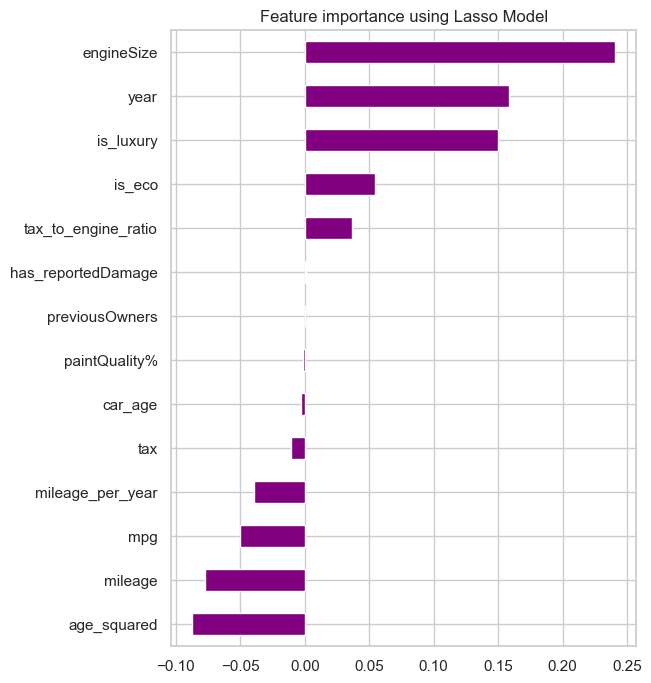

In [82]:
sns.set_style('whitegrid')
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(6,8))
    imp_coef.plot(kind = "barh", color='purple')
    plt.title("Feature importance using " + name + " Model")
    plt.show()
plot_importance(coef,'Lasso')

According to Lasso, we should not remove any variable as no variable seems insignificant (**coefficient == 0**). `paintQuality%`, `hasDamage`, `tax` and `previousOwners` seem less important than their remaining predictors.

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- |--- |---|
| year | Keep? | Keep | Keep | Discard |
| engineSize | Keep | Keep | Discard? | Discard |
| is_luxury | Keep | Keep | Keep | Include in the model |
| is_eco | Keep | Keep | Keep | Include in the model |
| tax | Keep? | Keep | Discard | Include in the model |
| previousOwners | Keep | Discard | Discard | Discard |
| paintQuality% | Keep | Keep | Discard | Discard |
| car_age | Keep? | Keep | Discard | Include in the model |
| mpg | Keep | Keep | Keep | Include in the model |
| mileage_per_year | Keep? | Discard | Keep | Include in the model? |
| mileage | Keep? | Keep | Keep | Include in the model |
| tax_to_engine_ratio | Keep? | Keep | Keep | Include in the model |
| age_squared | Keep? | Keep | Keep | Include in the model |
| has_reportedDamage | Keep | Keep | Discard | Discard |


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Brand | Keep |  
| model | Keep | 
| transmission | Keep | 
| fuelType | Keep|
| mileage_bin | Keep |


<hr>

<h2 style="background-color:#E6A3D6; color:white; padding:3px 6px; border-radius:4px; font-weight:bold;">
5. Machine Learning Model
</h2>

Selecting the desired features.

In [83]:
X_train_selected = X_train[['Brand','fuelType', 'transmission','model', 'mileage','mileage_per_year', 'mpg', 'is_eco', 'is_luxury', 'tax_to_engine_ratio', 'age_squared','car_age']]
X_val_selected = X_val[['Brand','fuelType', 'transmission','model', 'mileage', 'mpg', 'mileage_per_year','is_eco', 'is_luxury', 'tax_to_engine_ratio', 'age_squared','car_age']]
X_test_selected = X_test[['Brand', 'fuelType','transmission','model', 'mileage', 'mpg','mileage_per_year', 'is_eco', 'is_luxury', 'tax_to_engine_ratio', 'age_squared','car_age']]

Function to evaluate each model created:

In [84]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    print("Validation set:")
    print("R²:", r2_score(y_val, y_pred_val))
    print("MAE:", mean_absolute_error(y_val, y_pred_val))
    print("RMSE:", root_mean_squared_error(y_val, y_pred_val))
    print("\nTraining set:")
    print("R²:", r2_score(y_train, y_pred_train))
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("RMSE:", root_mean_squared_error(y_train, y_pred_train))
    print("-" * 60)

In [100]:
def evaluate_model_original_scale(model, X_train, X_val, y_train, y_val):
    # predições em log
    y_pred_train_log = model.predict(X_train)
    y_pred_val_log = model.predict(X_val)

    # voltar para a escala original
    y_pred_train = np.exp(y_pred_train_log)
    y_pred_val = np.exp(y_pred_val_log)

    print("Validation set:")
    print("R²:", r2_score(y_val, y_pred_val))
    print("MAE:", mean_absolute_error(y_val, y_pred_val))
    print("RMSE:", root_mean_squared_error(y_val, y_pred_val))
    print("\nTraining set:")
    print("R²:", r2_score(y_train, y_pred_train))
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("RMSE:", root_mean_squared_error(y_train, y_pred_train))
    print("-" * 60)


Data pre-processing transformation before model application.

In [ ]:

numerical_features = ['mileage_per_year','mpg','mileage','tax_to_engine_ratio','age_squared','car_age']
oh_encoded_features = ['Brand', 'transmission', 'fuelType','model']
#target_encoded_features = ['model']

preprocessor= ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),

        ('cat_oh', OneHotEncoder(handle_unknown='ignore', sparse_output=True), oh_encoded_features),

        #('cat_target', TargetEncoder(smooth=0.3), target_encoded_features)
    ],
    remainder='passthrough'
)

In [95]:
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

low_card_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Pipeline para as features com Target Encoding — sem 'categories'
target_encoder_pipeline = Pipeline(steps=[
    ('target_encoder', TargetEncoder())
])

preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('high_card', target_encoder_pipeline, ['Brand', 'model']),
        ('low_card', low_card_pipeline, ['fuelType', 'transmission'])
    ],
    remainder='drop',
    n_jobs=-1
)

### Elastic Net

In [86]:
# elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=1000, random_state=42)

# EN_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('elasticnet', elastic_model)
# ])

# EN_pipeline.fit(X_train_selected, y_train)
# evaluate_model(EN_pipeline, X_train_selected, X_val, y_train, y_val)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform

# 1. Pipeline de Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_v2),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# 2. Espaço de Busca OTIMIZADO (menos parâmetros, ranges mais focados)
param_distributions = {
    # Reduzir o range de n_estimators (valores muito altos raramente valem a pena)
    'regressor__n_estimators': [100, 200, 300, 500],  # Lista fixa em vez de randint
    
    # Focar em profundidades mais razoáveis
    'regressor__max_depth': [10, 20, 30, None],
    
    # Reduzir o range de min_samples_split
    'regressor__min_samples_split': [2, 5, 10],
    
    # Reduzir o range de min_samples_leaf
    'regressor__min_samples_leaf': [1, 2, 4],
    
    # Apenas as melhores heurísticas
    'regressor__max_features': ['sqrt', 'log2']
}

# 3. RandomizedSearchCV OTIMIZADO
rf_random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_distributions,
    n_iter=20,                    # REDUZIDO de 50 para 20 (reduz 60% do tempo)
    cv=3,                         # REDUZIDO de 5 para 3 folds (reduz 40% do tempo)
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# 4. Execução da Busca
print("Iniciando Randomized Search para Random Forest (versão otimizada)...")
rf_random_search.fit(X_train_selected, y_train_log) 
print("Busca concluída.")

# 5. Resultados
best_rf_model = rf_random_search.best_estimator_
best_score = -rf_random_search.best_score_
best_params = rf_random_search.best_params_

print("\n--- Melhores Resultados ---")
print(f"Melhor MAE na Validação Cruzada (no log-scale): {best_score:.4f}")
print("Melhores Parâmetros:")
for k, v in best_params.items():
    print(f"  {k}: {v}")

# Previsões
y_pred_log = best_rf_model.predict(X_val) 
y_pred_original = np.exp(y_pred_log)



Iniciando Randomized Search para Random Forest (versão otimizada)...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Busca concluída.

--- Melhores Resultados ---
Melhor MAE na Validação Cruzada (no log-scale): 0.0840
Melhores Parâmetros:
  regressor__n_estimators: 500
  regressor__min_samples_split: 2
  regressor__min_samples_leaf: 1
  regressor__max_features: sqrt
  regressor__max_depth: 20
Validation set:
R²: -3.1156364798422533
MAE: 16750.314419474544
RMSE: 19251.362735537237

Training set:


ValueError: Found input variables with inconsistent numbers of samples: [14901, 59562]

In [101]:
evaluate_model(best_rf_model, X_train_selected, X_val_selected, y_train_log, y_val_log)
evaluate_model_original_scale(best_rf_model,X_train_selected,X_val_selected,y_train,y_val)


Validation set:
R²: 0.9469989684211935
MAE: 0.0841859103102929
RMSE: 0.12114862015602225

Training set:
R²: 0.9822830610866031
MAE: 0.05176315958106049
RMSE: 0.0710884087980181
------------------------------------------------------------
Validation set:
R²: 0.9289926968346796
MAE: 1393.0324490453906
RMSE: 2528.6835444954945

Training set:
R²: 0.9722167816025359
MAE: 874.5809469652019
RMSE: 1634.0215940215442
------------------------------------------------------------


In [102]:
y_test_log = best_rf_model.predict(X_test)
y_test_original=np.exp(y_test_log)
y_test_original = pd.Series(y_test_original, name="price", index=X_test.index)
y_test_original.to_csv("y_test.csv", index=True)

### SVM

In [ ]:
"""
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=5, gamma=0.05)) 
])

svr_pipeline.fit(X_train_selected, y_train)
evaluate_model(svr_pipeline, X_train, X_val, y_train, y_val)
"""

"\nsvr_pipeline = Pipeline(steps=[\n    ('preprocessor', preprocessor),\n    ('regressor', SVR(kernel='rbf', C=5, gamma=0.05)) \n])\n\nsvr_pipeline.fit(X_train_selected, y_train)\nevaluate_model(svr_pipeline, X_train, X_val, y_train, y_val)\n"

In [ ]:
"""y_test2 = svr_pipeline.predict(X_test)
y_test2 = pd.Series(y_test, name="price", index=X_test.index)
y_test2.to_csv("y_test.csv", index=True)"""

'y_test2 = svr_pipeline.predict(X_test)\ny_test2 = pd.Series(y_test, name="price", index=X_test.index)\ny_test2.to_csv("y_test.csv", index=True)'

### Lasso

In [ ]:
# from sklearn.linear_model import Lasso
# lasso = Lasso(alpha=1.0, max_iter=10000)

# lasso_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('lasso', lasso)
# ])
# lasso_pipeline.fit(X_train_selected, y_train)
# evaluate_model(lasso_pipeline, X_train, X_val, y_train, y_val)

### Decision tree


In [ ]:
# from sklearn.tree import DecisionTreeRegressor

# tree = DecisionTreeRegressor(
#     criterion='squared_error', 
#     max_depth=5,                
#     random_state=42
# )

# tree_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('tree', tree)
# ])

# tree_pipeline.fit(X_train_selected, y_train)
# evaluate_model(tree_pipeline, X_train, X_val, y_train, y_val)

### Stochastic Gradient Descent

In [ ]:
# sgd_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', SGDRegressor(
#         max_iter=1000, tol=1e-3, penalty='l2', random_state=42))
# ])

# sgd_pipeline.fit(X_train, y_train)
# evaluate_model(sgd_pipeline, X_train, X_val, y_train, y_val)

### K-Nearest-Neighbors

In [ ]:
# knn_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', KNeighborsRegressor(n_neighbors=5, weights='distance', n_jobs=-1))
# ])

# knn_pipeline.fit(X_train, y_train)
# evaluate_model(knn_pipeline, X_train, X_val, y_train, y_val)

### Linear Regression

In [ ]:
# linear_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# linear_pipeline.fit(X_train, y_train)
# evaluate_model(linear_pipeline, X_train, X_val, y_train, y_val)

### Ridge Regression

In [ ]:
# ridge_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', Ridge(alpha=1.0, random_state=42))
# ])

# ridge_pipeline.fit(X_train, y_train)
# evaluate_model(ridge_pipeline, X_train, X_val, y_train, y_val)
